<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_07_Clustering_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
## Perform clustering (Hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
### Draw the inferences from the clusters obtained.

+ Clustering analysis is an unsupervised learning method that separates the data points into several specific bunches or groups, such that the data points in the same groups have similar properties and data points in different groups have different properties in some sense.

+ It comprises of many different methods based on different distance measures. E.g. K-Means (distance between points), Affinity propagation (graph distance), Mean-shift (distance between points), DBSCAN (distance between nearest points), Gaussian mixtures (Mahalanobis distance to centers), Spectral clustering (graph distance), etc.

+ Centrally, all clustering methods use the same approach i.e. first we calculate similarities and then we use it to cluster the data points into groups or batches. Here we will focus on the Density-based spatial clustering of applications with noise (DBSCAN) clustering method.

## 0.1 Table of Contents<a class="anchor" id="0.1"></a>

1. [Case Summary](#1)
    - 1.1 [About the Dataset](#1.1)
2. [Data Exploration](#2)
    - 2.1 [Missing Values](#2.1)
3. [Exploratory Data Analysis](#3)
    - 3.1 [Outlier Detection](#3.1)
4. [Data Visualization](#4)
5. [Data Pre-processing](#5)
    - 5.1 [Standardizing the Data](#5.1)
    - 5.2 [Normalizing the Data](#5.2)
6. [KMeans Clustering](#6)
    - 6.1 [Elbow Method for Determining Cluster Amount on Standard Scaled Data](#6.1)
    - 6.2 [Silhoutte Score](#6.2)
    - 6.3 [Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset](#6.3)
    - 6.4 [Elbow Method and Silhouette Score on MinMaxScaler Applied Data](#6.4)
    - 6.5 [Build KMeans Cluster algorithm using K=4 and MinMaxScaler Applied Dataset](#6.5)
7. [Hierarchical Clustering Algorithm](#7)
    - 7.1 [Dendogram on MinMaxScaler Applied on Dataset](#7.1)
    - 7.2 [Dendrogram on Standard Scaler Applied on Data](#7.2)
    - 7.3 [PCA](#7.3)
        - 7.3A [Running PCA of Standardized data](#7.3A)
        - 7.3B [Silhouette Score method for PCA Standard Scaled Data](#7.3B)
        - 7.3C [Run Hierarchical Clustering.(Agglomerative Clustering) on Standard Scaled Data](#7.3C)
        - 7.3D [Running PCA of Normalized data](#7.3D)
        - 7.3E [Silhouette Score method for PCA MinMax Scaled Data](#7.3E)
        - 7.3F [Run Hierarchical Clustering.(Agglomerative Clustering) on MinMax Scaled Data](#7.3F)
8. [DBSCAN - (Density Based Spatial Clustering of Applications with Noise)](#8)
    - 8.1 [DBSCAN of Standard Scaled Data](#8.1)
    - 8.2 [DBSCAN of MinMax Scaled Data](#8.2)
9. [Conclusion](#9)

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [ ]:
# Data display customization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-2-a1c1189605b9>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [ ]:
data = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name = 'data')
data.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1    28143    0           1          1          1          174           
1  2    19244    0           1          1          1          215           
2  3    41354    0           1          1          1          4123          
3  4    14776    0           1          1          1          500           
4  5    97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1

In [ ]:
# Rename column names
data.rename({'ID#': 'ID', 'Award?':'Award'},axis = 1, inplace=True)
data
# Set ID as index column
data.set_index('ID', inplace=True)
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  
ID           
1     0      
2     0      
3     0      
4     0      
5     1      
...  ..      
4017  1      
4018  1      
4019  1      
4020  0      
4021  0      

[3999 rows x 11 columns]

### 1.1 Data Description: <a class="anchor" id="1.1"></a>

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

+ ID --Unique ID

+ Balance--Number of miles eligible for award travel

+ Qual_mile--Number of miles counted as qualifying for Topflight status

+ cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
+ cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
+ cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:


+ <b>Note</b>:
1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000


+ Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

+ Bonus_trans--Number of non-flight bonus transactions in the past 12 months

+ Flight_miles_12mo--Number of flight miles in the past 12 months

+ Flight_trans_12--Number of flight transactions in the past 12 months

+ Days_since_enrolled--Number of days since enrolled in flier program

+ Award--whether that person had award flight (free flight) or not

## 2. Data Exploration <a class="anchor" id="2"></a>

### Descriptive Statistics

In [ ]:
data.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03  3999.000000   3999.000000  3999.000000  3999.000000   
mean   7.360133e+04  144.114529    2.059515     1.014504     1.012253      
std    1.007757e+05  773.663804    1.376919     0.147650     0.195241      
min    0.000000e+00  0.000000      1.000000     1.000000     1.000000      
25%    1.852750e+04  0.000000      1.000000     1.000000     1.000000      
50%    4.309700e+04  0.000000      1.000000     1.000000     1.000000      
75%    9.240400e+04  0.000000      3.000000     1.000000     1.000000      
max    1.704838e+06  11148.000000  5.000000     3.000000     5.000000      

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000    3999.00000   3999.000000        3999.000000       
mean   17144.846212   11.60190     460.055764         1.373593          
std    24150.967826   9.60381      1400.209171        3.793172          
min    0.000000       0.00000      0.000000           0.000000          
25%    1250.000000    3.00000      0.000000           0.000000          
50%    7171.000000    12.00000     0.000000           0.000000          
75%    23800.500000   17.00000     311.000000         1.000000          
max    263685.000000  86.00000     30817.000000       53.000000         

       Days_since_enroll        Award  
count  3999.00000         3999.000000  
mean   4118.55939         0.370343     
std    2065.13454         0.482957     
min    2.00000            0.000000     
25%    2330.00000         0.000000     
50%    4096.00000         0.000000     
75%    5790.50000         1.000000     
max    8296.00000         1.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
# Different cc_miles have different max values
# so, we want to check what values these columns can take
print('Unique cc1_mile', data.cc1_miles.unique())
print('Unique cc2_mile', data.cc2_miles.unique())
print('Unique cc3_mile', data.cc3_miles.unique())

Unique cc1_mile [1 4 3 2 5]
Unique cc2_mile [1 2 3]
Unique cc3_mile [1 3 2 4 5]


### 2.1 Missing Values <a class="anchor" id="2.1"></a>

In [ ]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

### Duplicated Values

In [ ]:
data.shape

(3999, 11)

In [ ]:
data[data.duplicated()]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
3899  1000     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
3899  0            0                  0                1597                

      Award  
ID           
3899  0

In [ ]:
data.drop_duplicates().reset_index(drop=True)

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     28143    0           1          1          1          174           
1     19244    0           1          1          1          215           
2     41354    0           1          1          1          4123          
3     14776    0           1          1          1          500           
4     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..            ...         
3993  18476    0           1          1          1          8525          
3994  64385    0           1          1          1          981           
3995  73597    0           3          1          1          25447         
3996  54899    0           1          1          1          500           
3997  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3993  4            200                1                1403                
3994  5            0                  0                1395                
3995  8            0                  0                1402                
3996  1            500                1                1401                
3997  0            0                  0                1398                

      Award  
0     0      
1     0      
2     0      
3     0      
4     1      
...  ..      
3993  1      
3994  1      
3995  1      
3996  0      
3997  0      

[3998 rows x 11 columns]

In [ ]:
data.shape

(3999, 11)

## 3. Exploratory Data Analysis<a class="anchor" id="3"></a>

### Lets analyze the features by creating histograms to understand the distribution

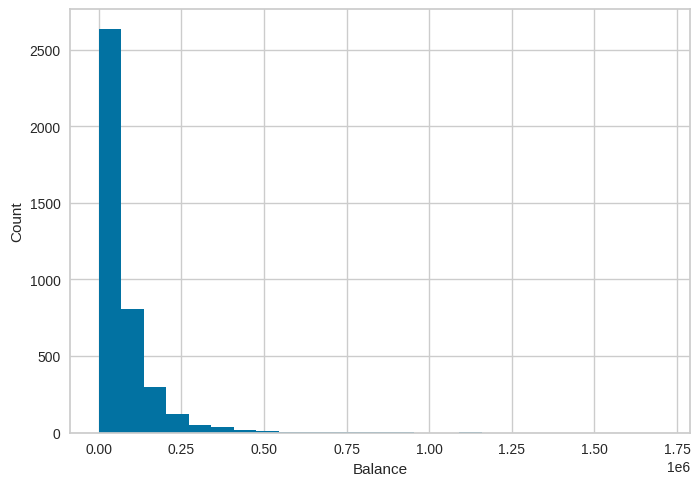

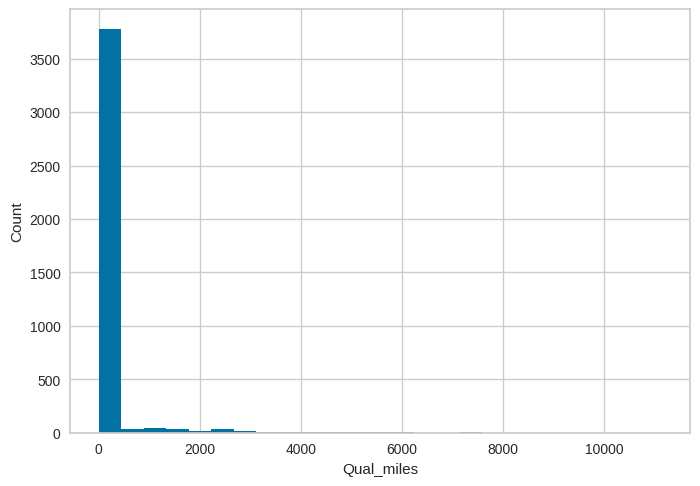

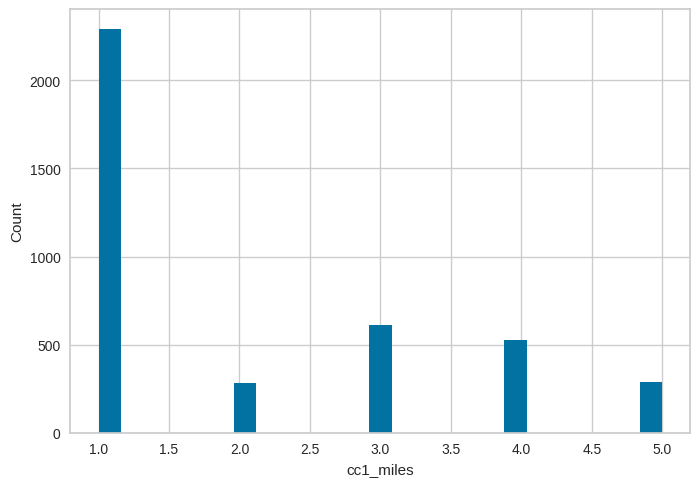

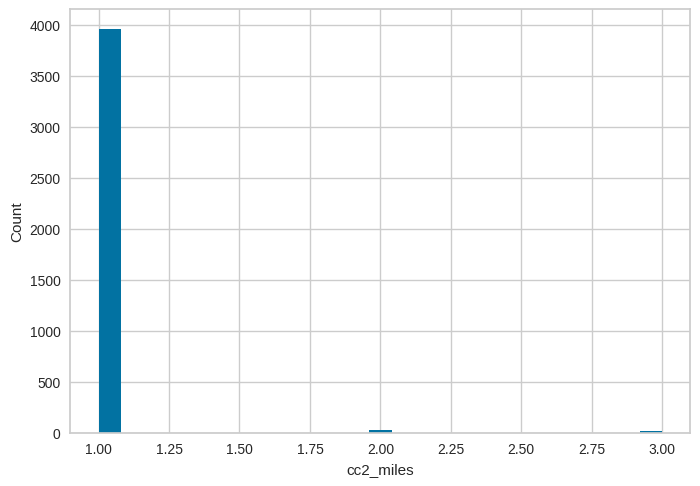

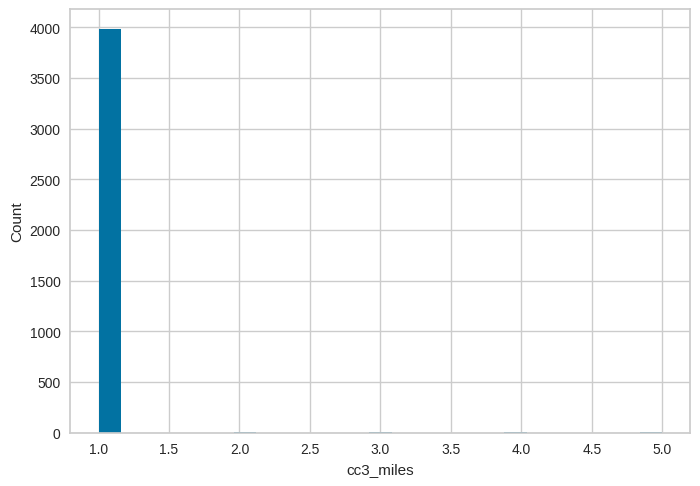

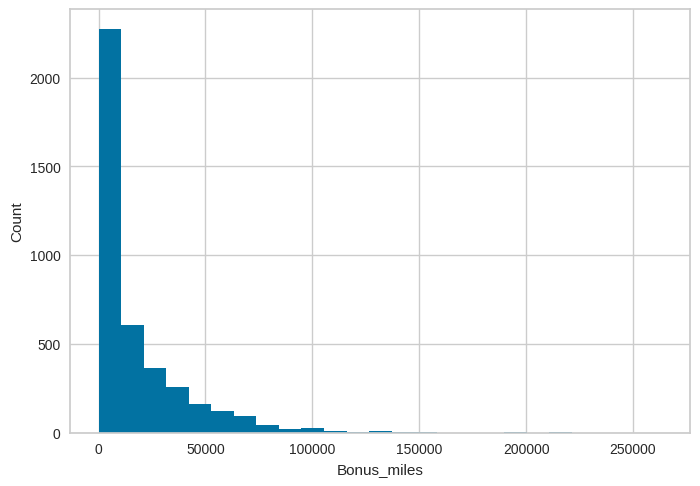

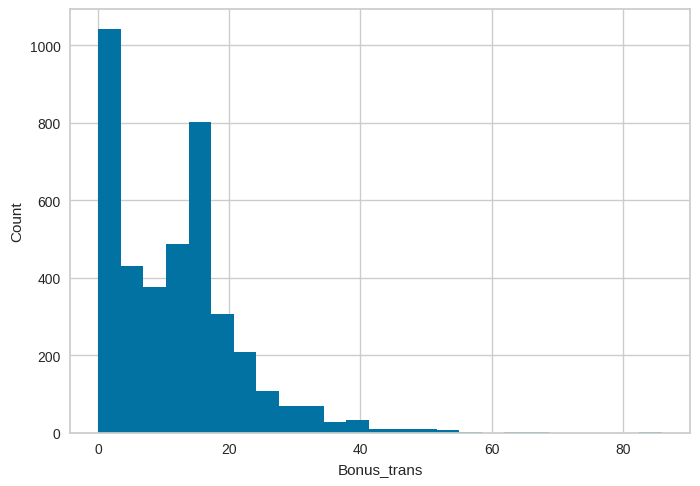

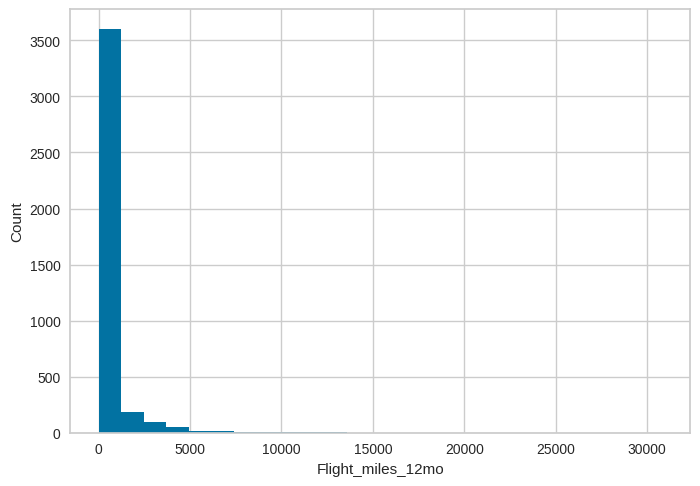

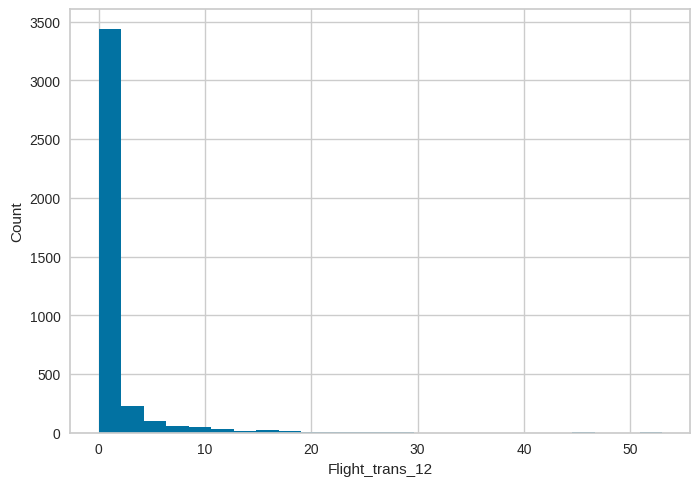

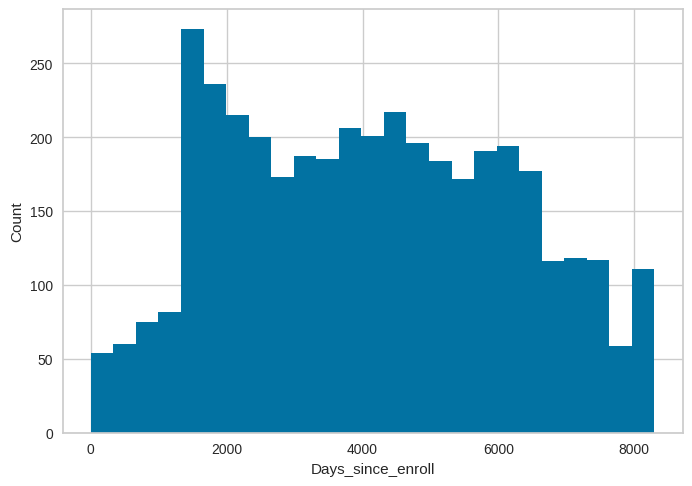

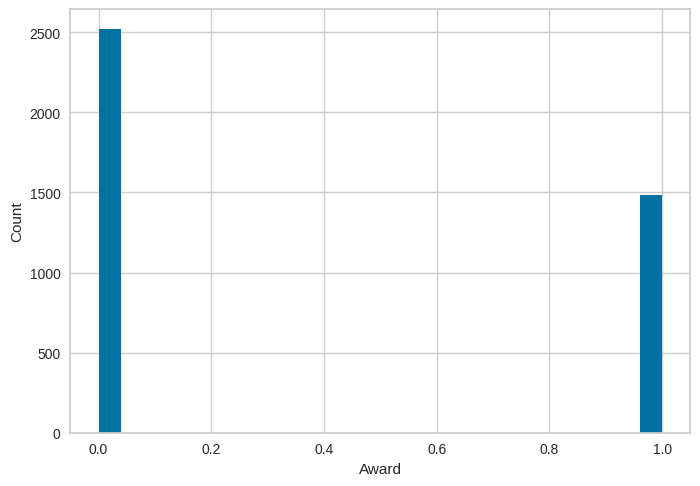

In [ ]:
for feature in data.columns:
  data = data.copy()
  data[feature].hist(bins = 25)
  plt.ylabel('Count')
  plt.xlabel(feature)
  plt.show()

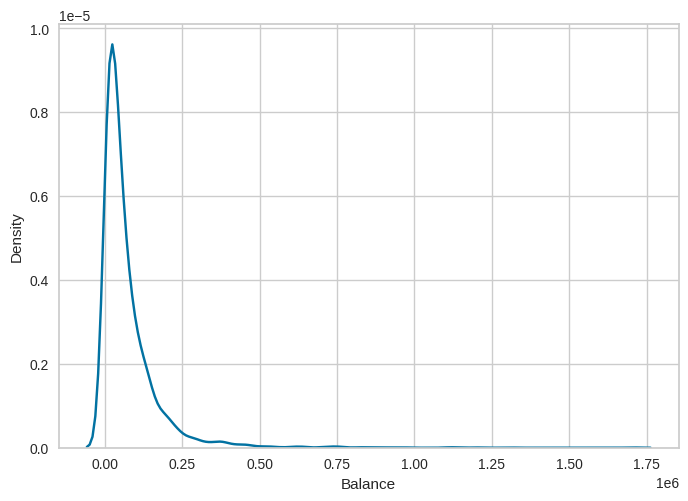

Balance


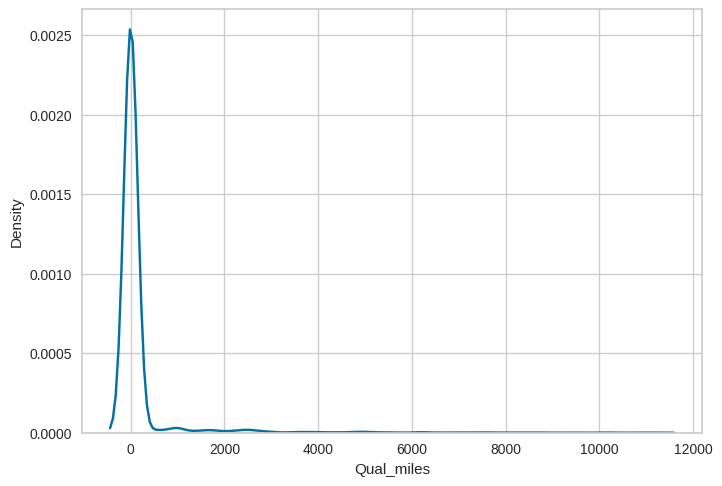

Qual_miles


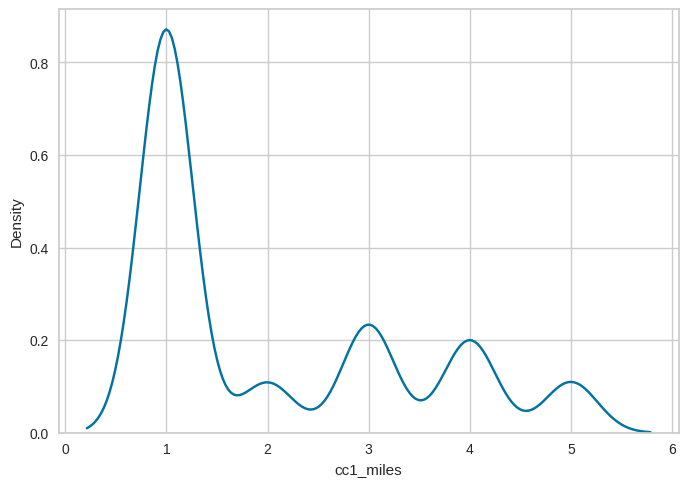

cc1_miles


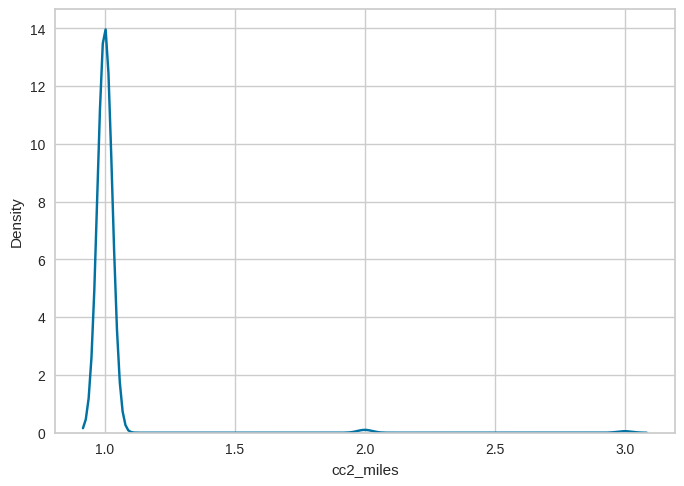

cc2_miles


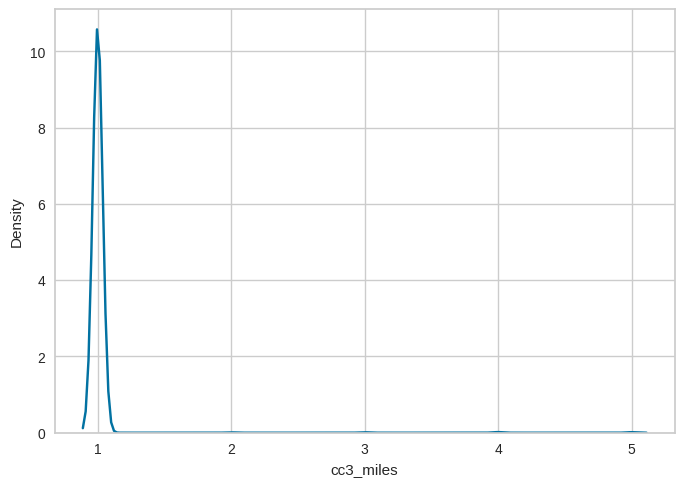

cc3_miles


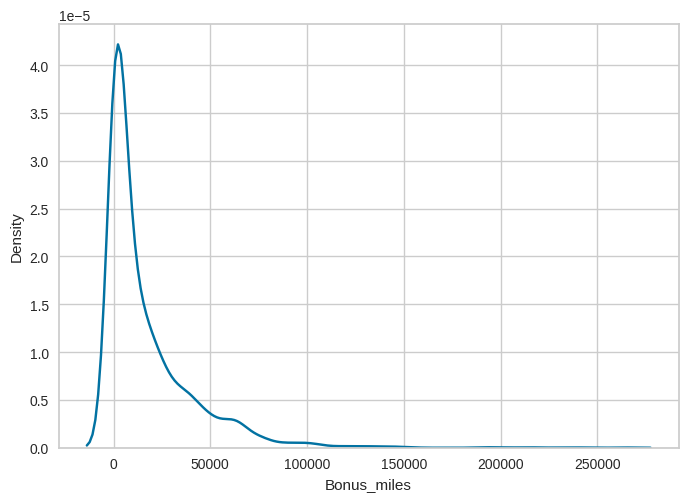

Bonus_miles


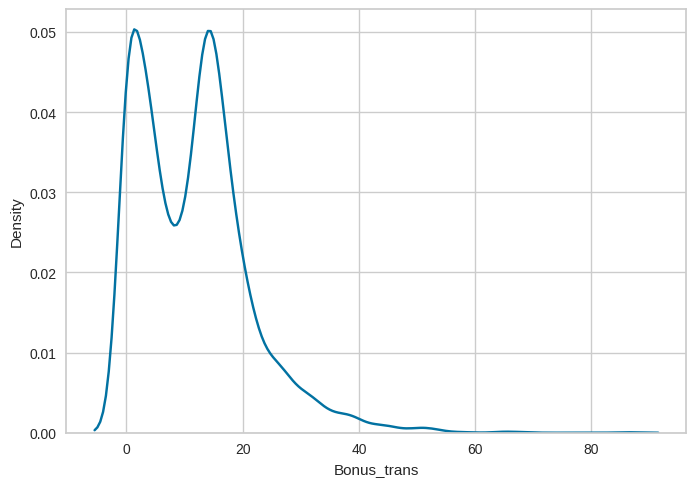

Bonus_trans


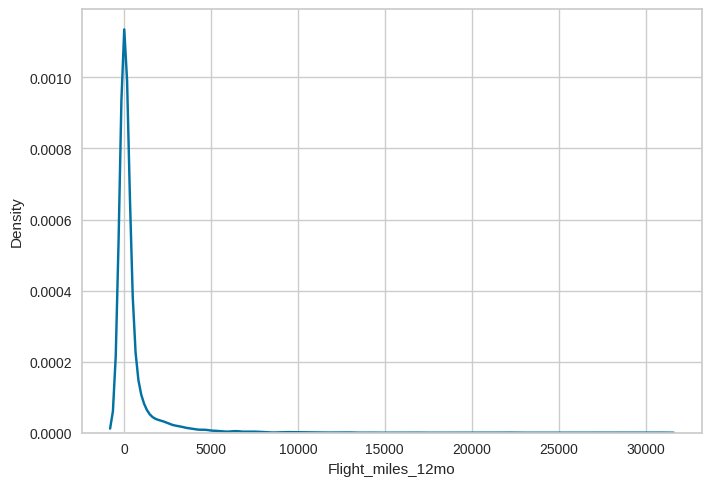

Flight_miles_12mo


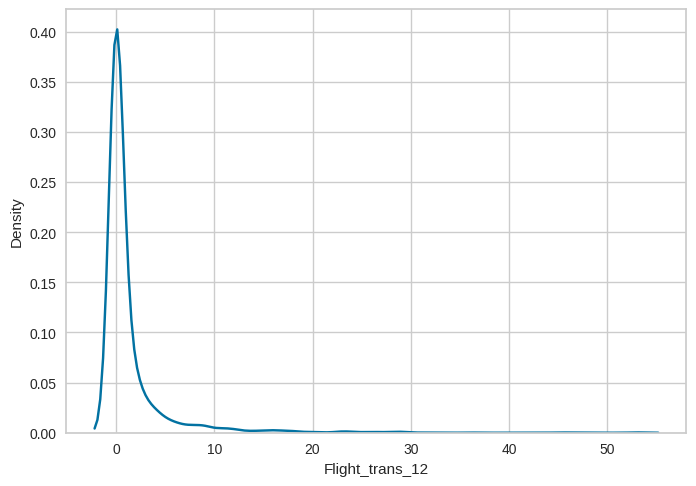

Flight_trans_12


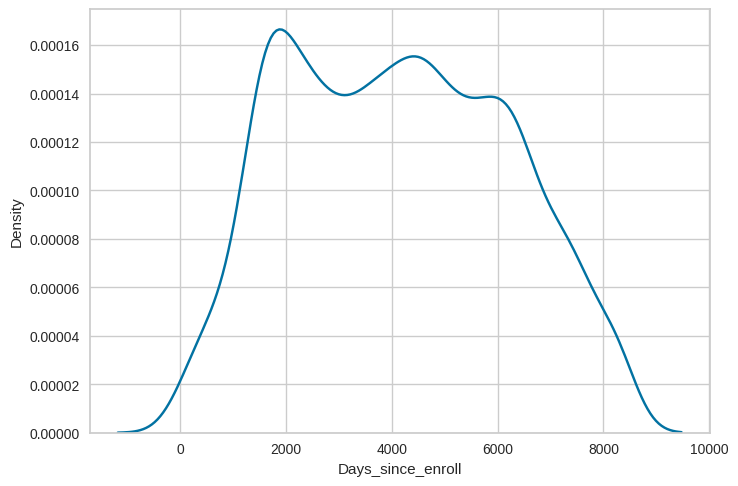

Days_since_enroll


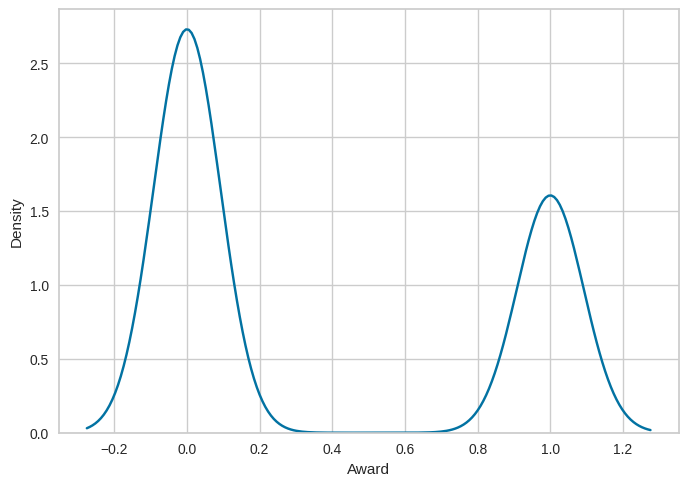

Award


In [ ]:
# Kernal density for every feature
for n in data.columns:
  sns.kdeplot(data[n])
  plt.show()
  print(n)

### 3.1 Outliers Detection<a class="anchor" id="3.1"></a>

In [ ]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

<ipython-input-16-015f65d27714>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Balance', data=ot, palette='crest', ax = axes[0])
<ipython-input-16-015f65d27714>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Qual_miles', data=ot, palette='crest', ax = axes[1])
<ipython-input-16-015f65d27714>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cc1_miles', data=ot, palette='crest', ax = axes[2])
<ipython-input-16-015f65d27714>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

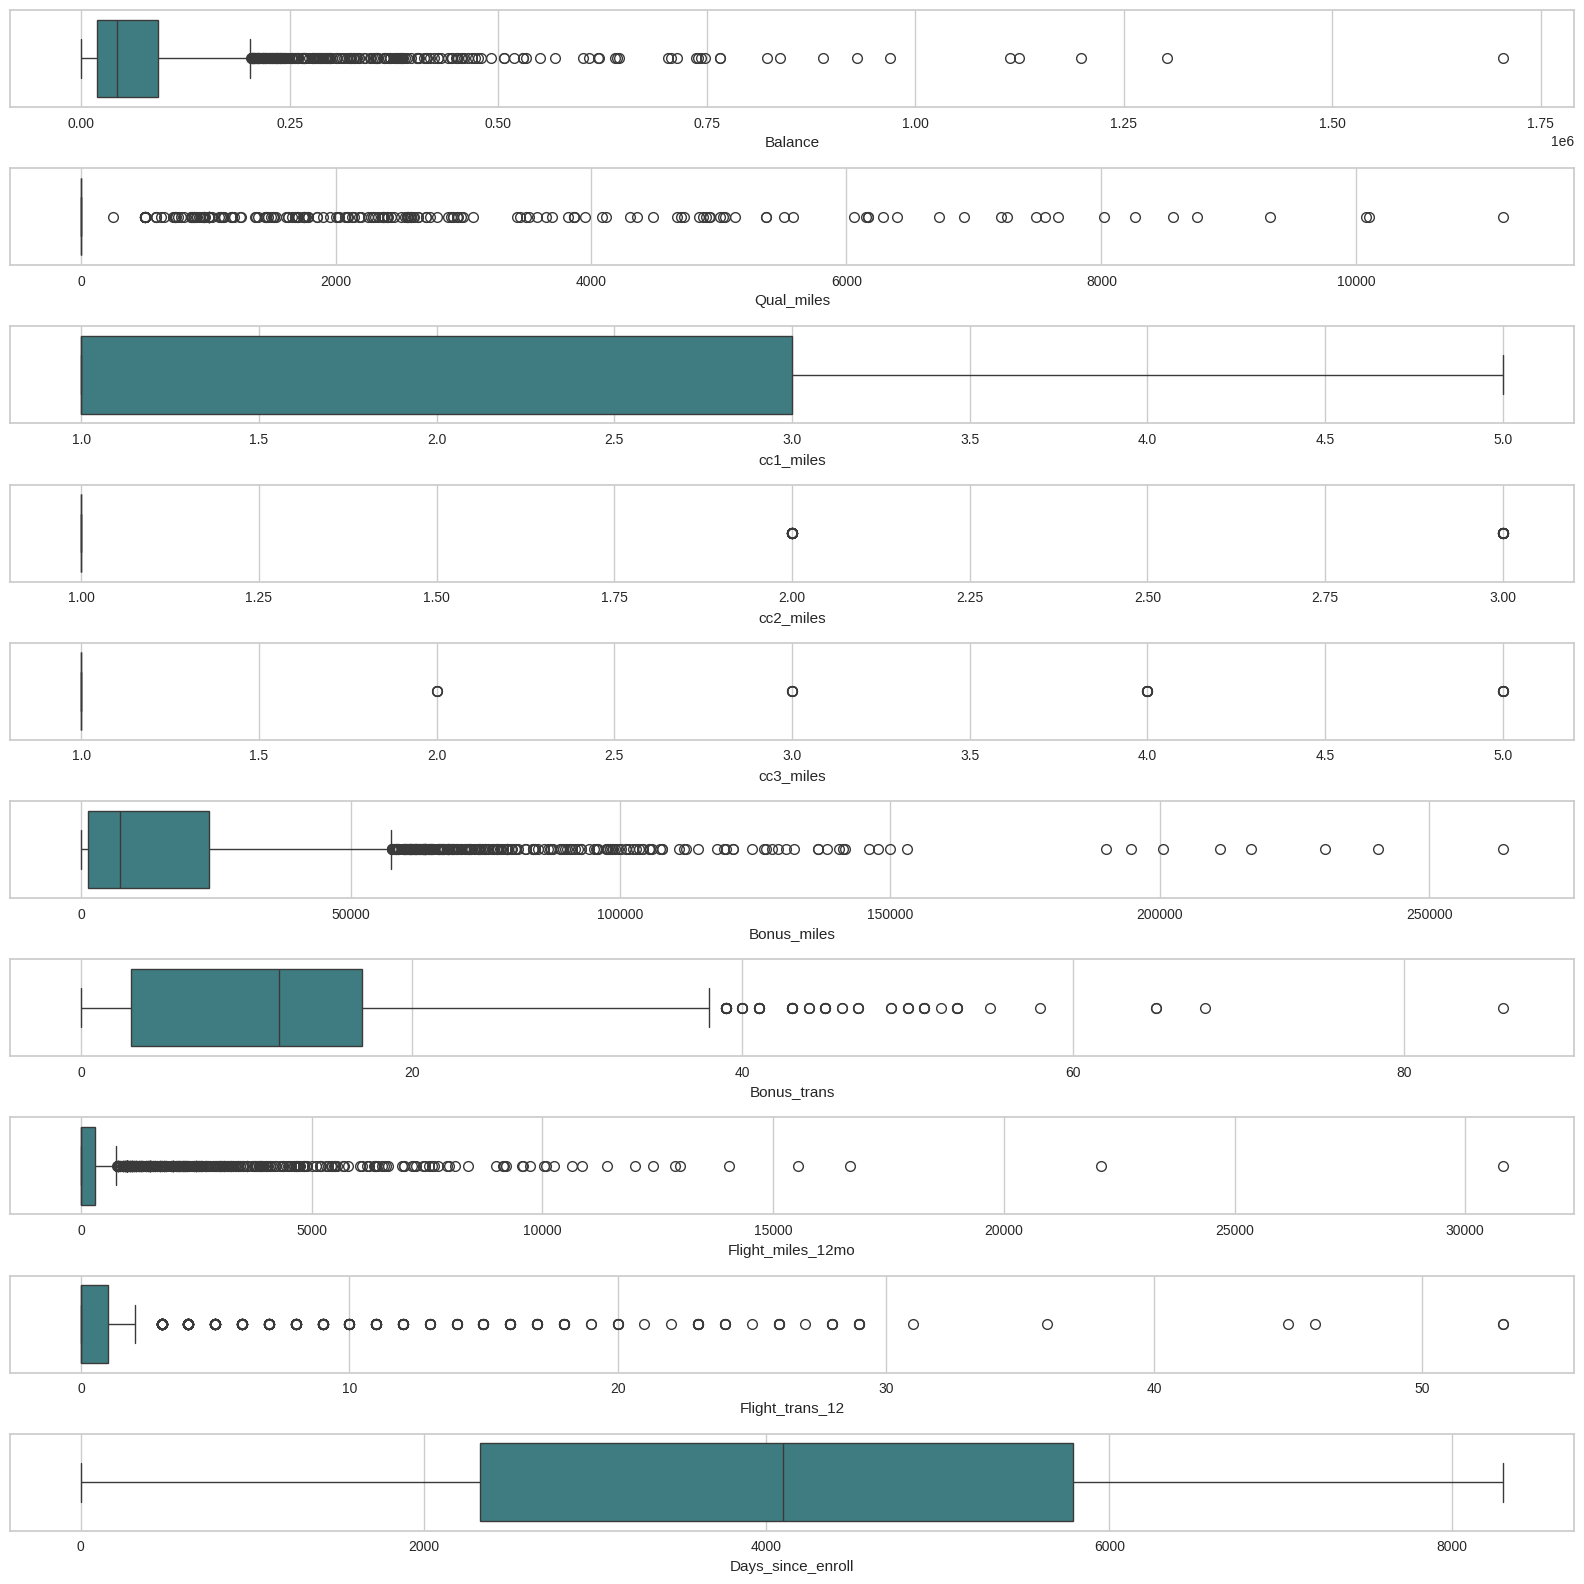

In [ ]:
ot = data.copy()
fig, axes = plt.subplots(10,1, figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance', data=ot, palette='crest', ax = axes[0])
sns.boxplot(x='Qual_miles', data=ot, palette='crest', ax = axes[1])
sns.boxplot(x='cc1_miles', data=ot, palette='crest', ax = axes[2])
sns.boxplot(x='cc2_miles', data=ot, palette='crest', ax = axes[3])
sns.boxplot(x='cc3_miles', data=ot, palette='crest', ax = axes[4])
sns.boxplot(x='Bonus_miles', data=ot, palette='crest', ax = axes[5])
sns.boxplot(x='Bonus_trans', data=ot, palette='crest', ax = axes[6])
sns.boxplot(x='Flight_miles_12mo', data=ot, palette='crest', ax = axes[7])
sns.boxplot(x='Flight_trans_12', data=ot, palette='crest', ax = axes[8])
sns.boxplot(x='Days_since_enroll', data=ot, palette='crest', ax = axes[9])
plt.tight_layout()

## 4. Data Visualization<a class="anchor" id="4"></a>

In [ ]:
countNoAward = len(data[data.Award == 0])
countHaveAward = len(data[data.Award != 0])
print('Percent of customer does not have award: {:.2f}%'.format(countNoAward / (len(data.Award))*100))
print('Percent of customer does have award: {:.2f}%'.format(countHaveAward / (len(data.Award))*100))

Percent of customer does not have award: 62.97%
Percent of customer does have award: 37.03%


Text(0.5, 1.0, 'Whether the client has a award or not')

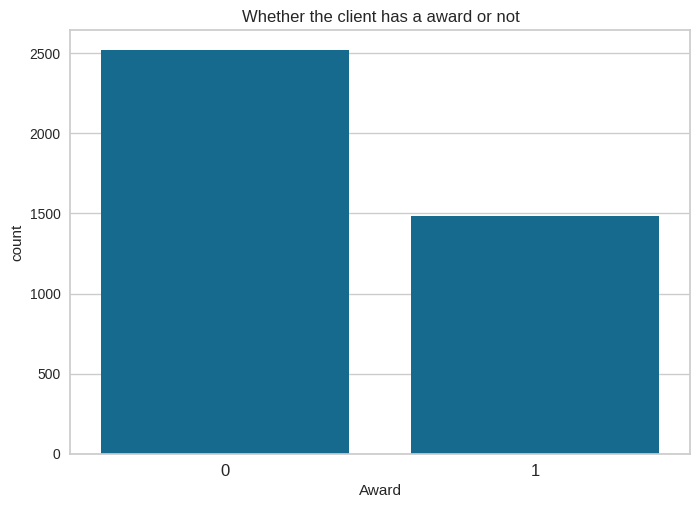

In [ ]:
sns.countplot(x = 'Award', data=data, order = data['Award'].value_counts().index)
plt.xticks(fontsize=12)
plt.title('Whether the client has a award or not')

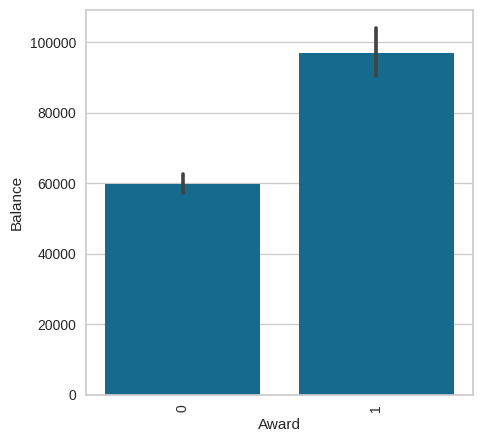

In [ ]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award', 'Balance']].sort_values('Balance', ascending=False)
ax = sns.barplot(x='Award', y='Balance', data=Balance)
ax.set(xlabel = 'Award', ylabel = 'Balance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# What is correlated with balance

corr_matrix = data.corr()
corr_matrix['Balance'].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

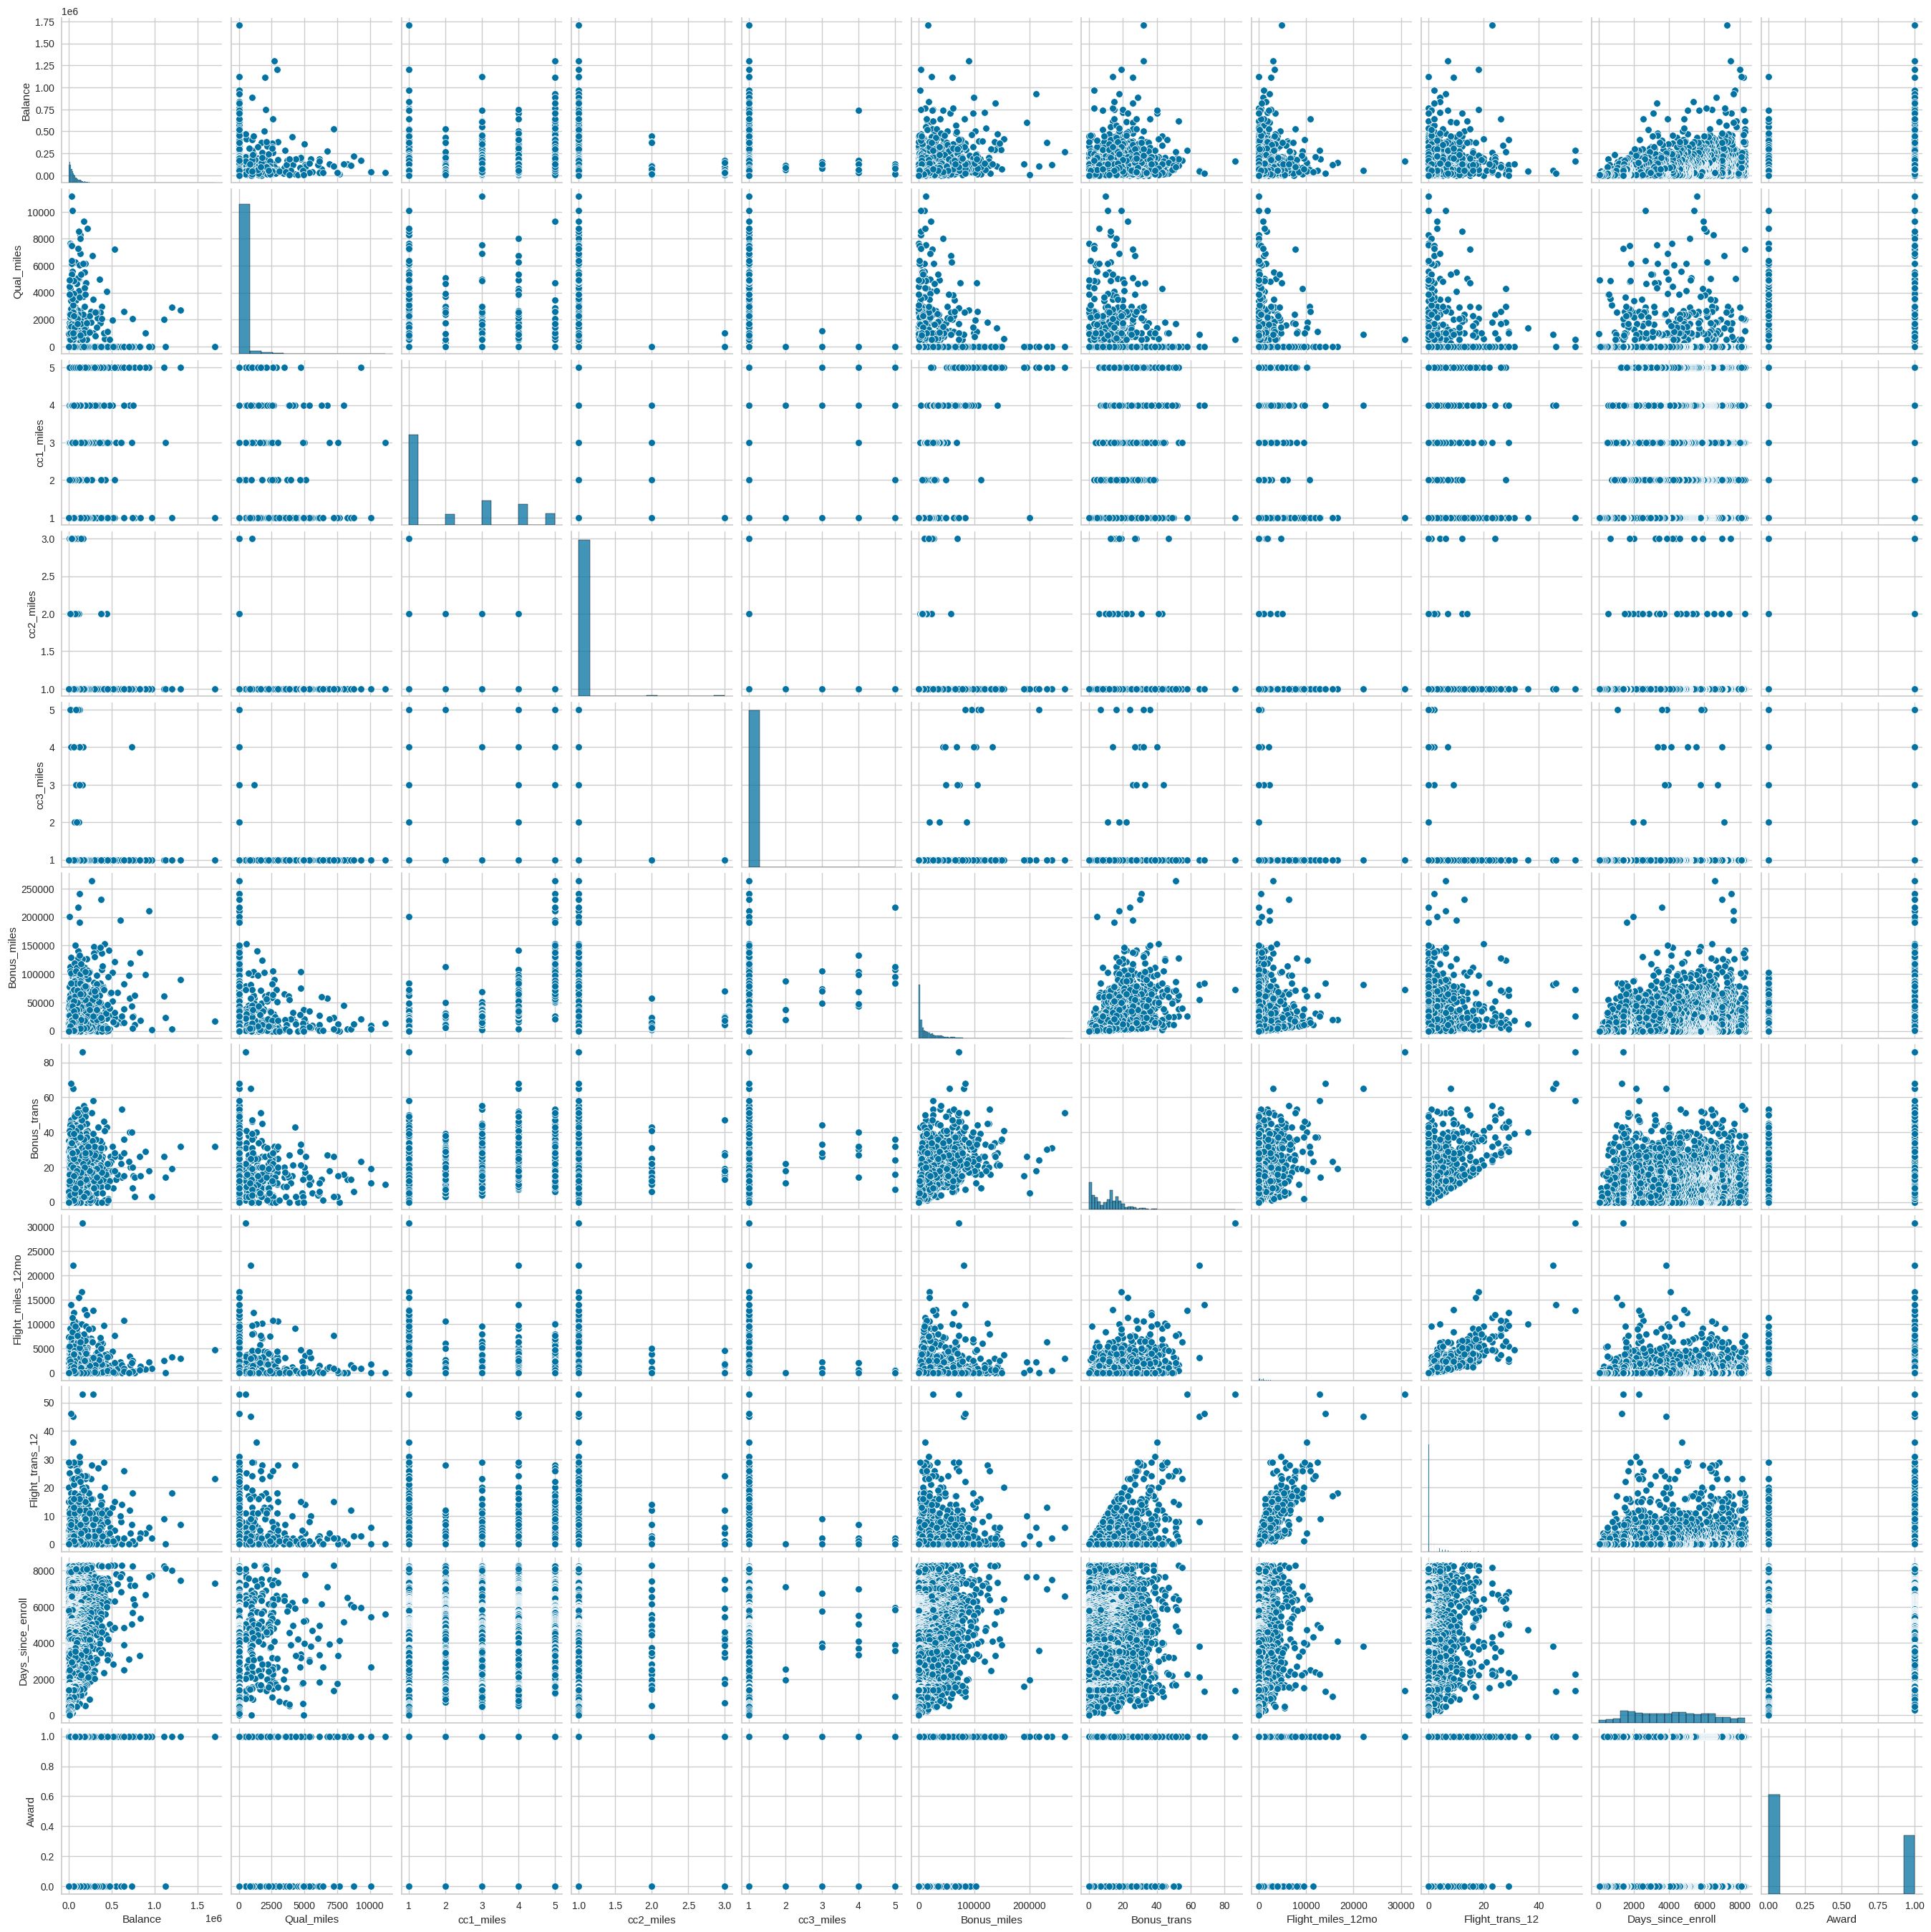

In [ ]:
sns.pairplot(data)

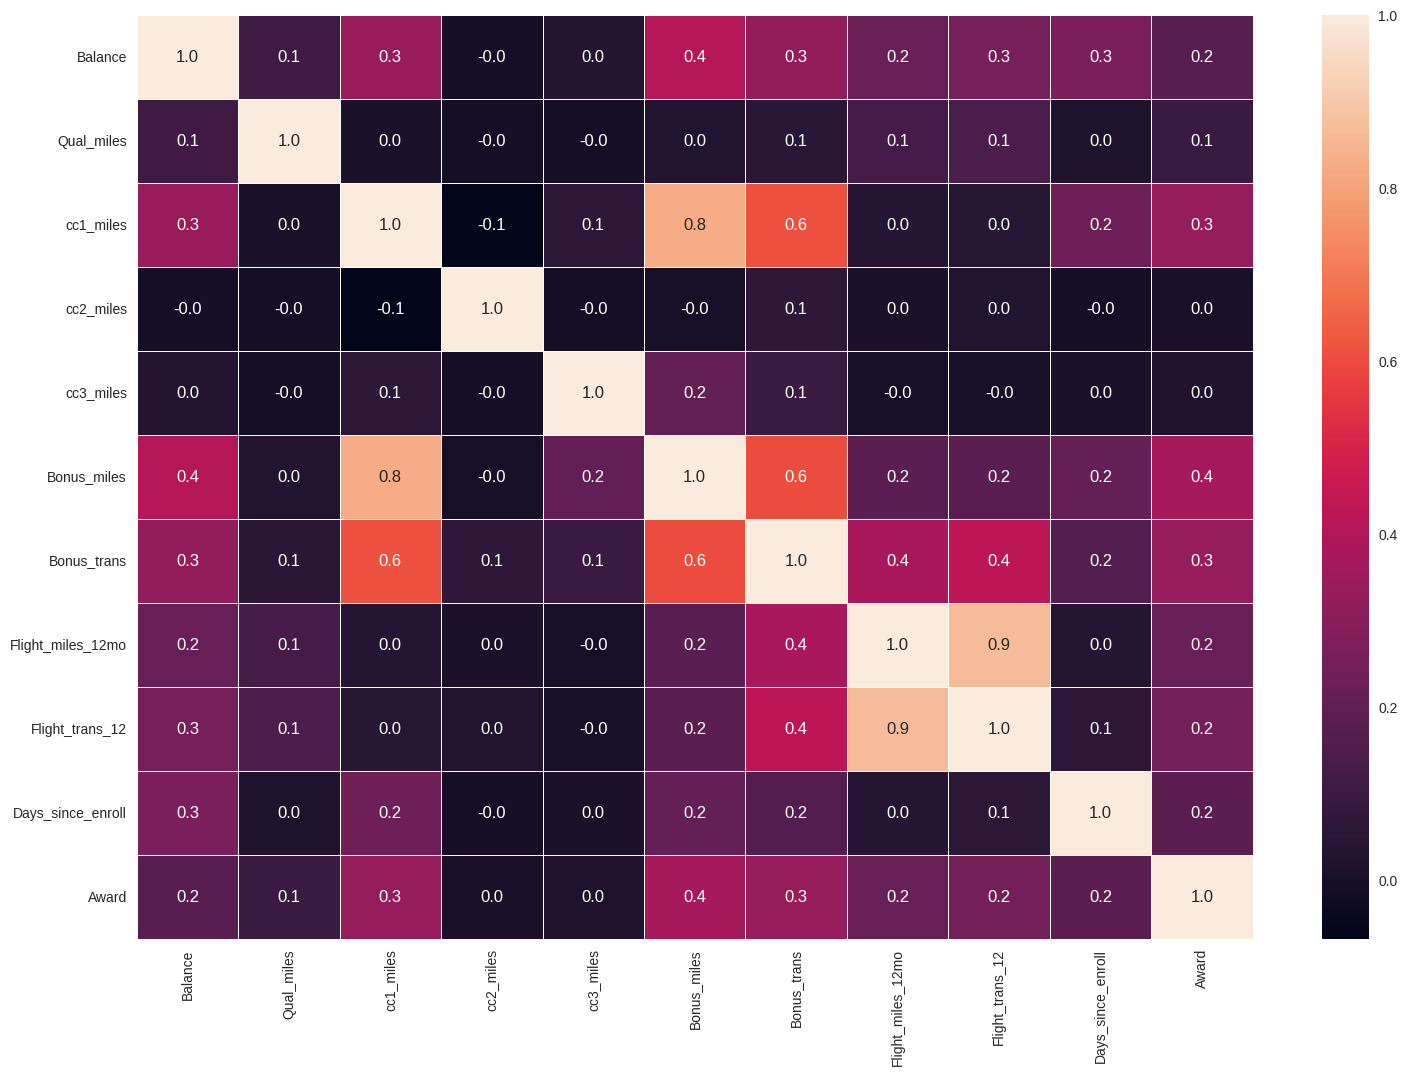

In [ ]:
# Correlation heatmap

f,ax = plt.subplots(figsize = (18,12))
sns.heatmap(data.corr(), annot=True, linewidths = .5, fmt= '.1f', ax=ax)
plt.show()

Unique points in this correlation matrix:

+ flight_trans_12 is positively correlated with flight_miles_12mo
+ bonus_trans is positively correlated with cc1_miles
+ bonus_trans is positively correlated with bonus_miles
+ bonus_miles is positively correlated with cc1_miles

In other words, the following are positively correlated

+ Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
+ Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
+ Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
+ Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

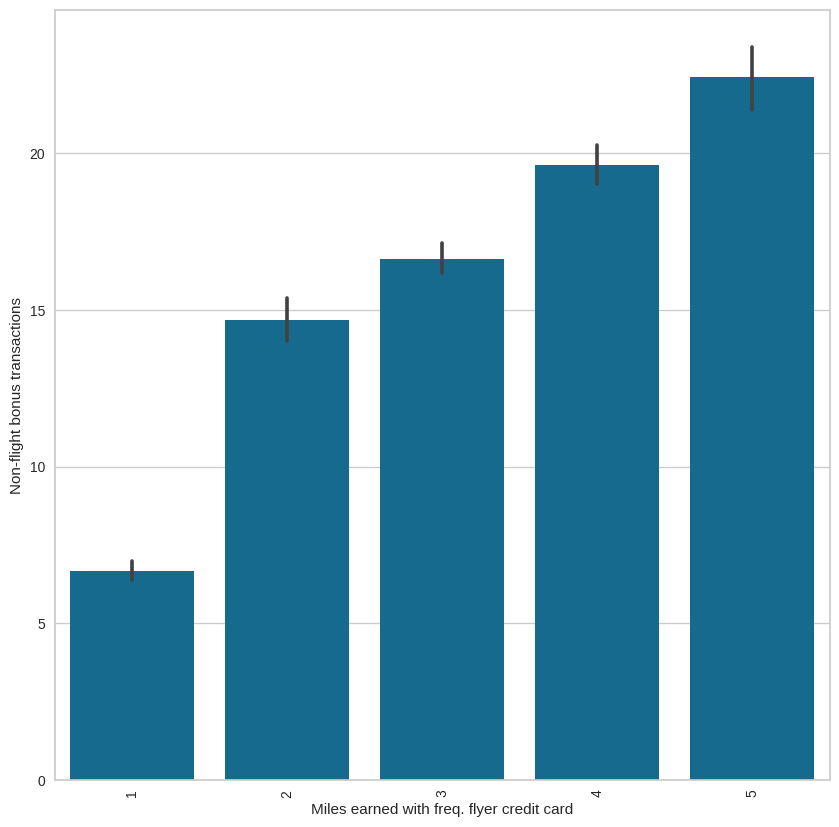

In [ ]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

#### People who fly more frequently use bonus transactions more

## 5. Data Preprocessing<a class="anchor" id="5"></a>

### 5.1) Standardizing the Data<a class="anchor" id="5.1"></a>

In [ ]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3999, 11)

## 6. KMeans Clustering<a class="anchor" id="6"></a>

After all the analyses we now start with the K-Means Clustering procedure

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective cluster centroid. The first step in k-means is to pick the number of clusters, k. Then keep the iterations running until one of the below satisifes:

1. Centroids of newly formed clusters do not change
2. Points remain in the same cluster
3. Maximum number of iterations are reached

In K Means clustering we need to first assign the K number of clusters which can be taken up using the thumb rule of "Sqrt(n)/2" or plotting the Elbow curve, aka Scree plot.

### 6.1 Elbow Method for Determining Cluster Amount<a class="anchor" id="6.1"></a>

### Standard Scaler Applied on Data

In [ ]:
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init=10)
  clusters.fit(std_df)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters': cluster_range, 'cluster_errors':cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             43989.000000  
1   2             35409.512258  
2   3             30906.115105  
3   4             27154.331169  
4   5             24836.792347  
5   6             21089.715866  
6   7             19882.070105  
7   8             17369.611867  
8   9             16049.684339  
9   10            14732.229882  
10  11            13940.979130  
11  12            12946.934811  
12  13            12493.990150  
13  14            11906.208107

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

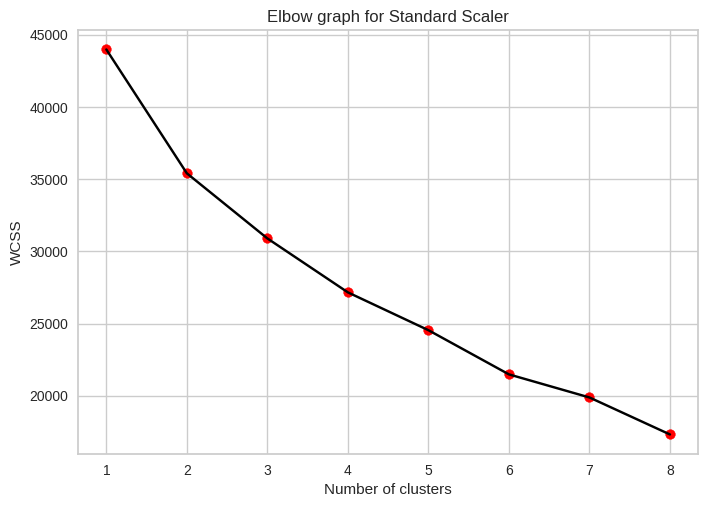

In [ ]:
# Within-cluster sum-of-squares criterion
# Use Elbow Graph to find optimum number of clusters (K value) from K Values range
# The K-menas algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS
# Random state can be anything from 0 to 42, but the same number to be used everytime, so that the results don't change.

wcss = []
for i in range(1,9):
  kmeans=KMeans(n_clusters=i, random_state=2)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

# plot K values range vs WCSS to get Elbow graph for choosing K value
plt.plot(range(1,9), wcss, color = 'black')
plt.scatter(range(1,9), wcss, color='red')
plt.title('Elbow graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score

<b>Internal measures for cluster validation

+ The goal of partitioning clustering algorithms is to split the data set into clusters of objects, such that:

the objects in the same cluster are similar as much as possible,
and the objects in different clusters are highly distinct
That is, we want the average distance within cluster to be as small as possible; and the average distance between clusters to be as large as possible.

Internal validation measures reflect often the compactness, the connectedness and the separation of the cluster partitions.

+ Compactness or cluster cohesion: Measures how close are the objects within the same cluster. A lower within-cluster variation is an indicator of a good compactness (i.e., a good clustering). The different indices for evaluating the compactness of clusters are base on distance measures such as the cluster-wise within average/median distances between observations.
+ Separation: Measures how well-separated a cluster is from other clusters. The indices used as separation measures include:
distances between cluster centers
the pairwise minimum distances between objects in different clusters
+ Connectivity: corresponds to what extent items are placed in the same cluster as their nearest neighbors in the data space. The connectivity has a value between 0 and infinity and should be minimized.
Generally most of the indices used for internal clustering validation combine compactness and separation measures as follow:

Index=(α×Separation)(β×Compactness)

Where α and β are weights.

In this section, we’ll describe the two commonly used indices for assessing the goodness of clustering: the silhouette width and the Dunn index. These internal measure can be used also to determine the optimal number of clusters in the data.



### 6.2 Silhouette Score<a class="anchor" id="6.2"></a>

<b>Silhouette coefficient

+ The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters.

For each observation i, the silhouette width si is calculated as follows:

For each observation i, calculate the average dissimilarity ai between i and all other points of the cluster to which i belongs. \
For all other clusters C, to which i does not belong, calculate the average dissimilarity d(i,C) of i to all observations of C. The smallest of these d(i,C) is defined as bi=minCd(i,C). The value of bi can be seen as the dissimilarity between i and its “neighbor” cluster, i.e., the nearest one to which it does not belong.
    

+ Finally the silhouette width of the observation i is defined by the formula: Si=(bi−ai)/max(ai,bi).\
Silhouette width can be interpreted as follow:

Observations with a large Si (almost 1) are very well clustered.\
A small Si (around 0) means that the observation lies between two clusters.\
Observations with a negative Si are probably placed in the wrong cluster.

In [ ]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10]
clusters_intertia = []
s_score = []

for n in n_clusters:
  KM_est = KMeans(n_clusters = n, init= 'k-means++').fit(std_df)
  clusters_intertia.append(KM_est.inertia_) #data for elbow method
  silhouette_avg = silhouette_score(std_df, KM_est.labels_)
  s_score.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

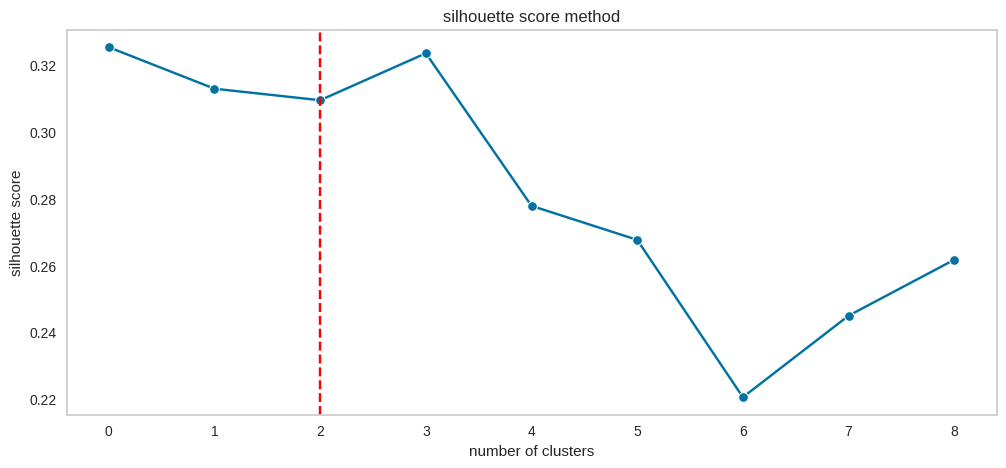

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))
ax = sns.lineplot( s_score, marker = 'o', ax= ax)
ax.set_title('silhouette score method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.axvline(2, ls='--', c='red')
plt.grid()
plt.show()

##### Silhouette score method indicates the best options would be respectively 2 clusters.

Elbow Plot for Standard Scaler data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

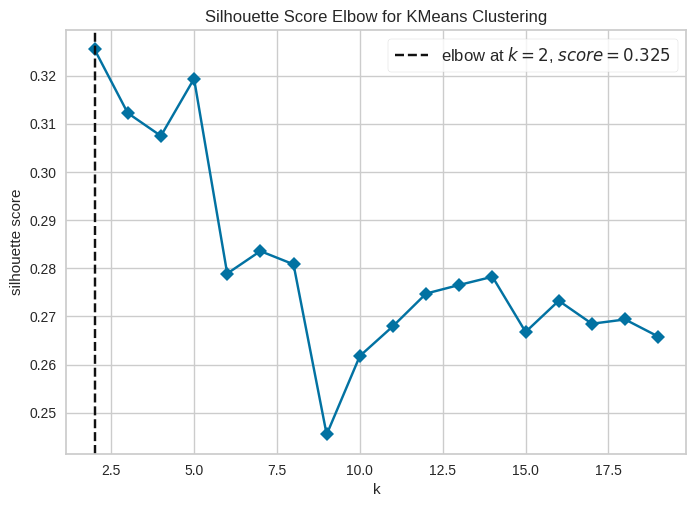

In [ ]:
# 1. How many number of clusters? n_clusters?

# Since true labels are not known..we will use Silhouette Coefficient (Clustering performance evaluation)
# knee Elbow graph method


# Instantiate a scikit-learn K-Means model. we will check for two diff hyperparameters value effect.
model = KMeans(random_state=10, max_iter=500, init='k-means++')

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,20), metric='silhouette', timings=False)
# Fit the data and visualize
print('Elbow Plot for Standard Scaler data')
visualizer.fit(std_df)
visualizer.poof()
plt.show()

In [ ]:
# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(std_df)
    sil_score1= sil(std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3256981835090824


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3121716765282414


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.32563311512799126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.31819537664378844


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3338735662323181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.22085896619040385


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.23657639934232003


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3256981835090824


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3121716765282414


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.32563311512799126


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.31819537664378844


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3338735662323181


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.22085896619040385


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.23657639934232003


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.2984364654012059


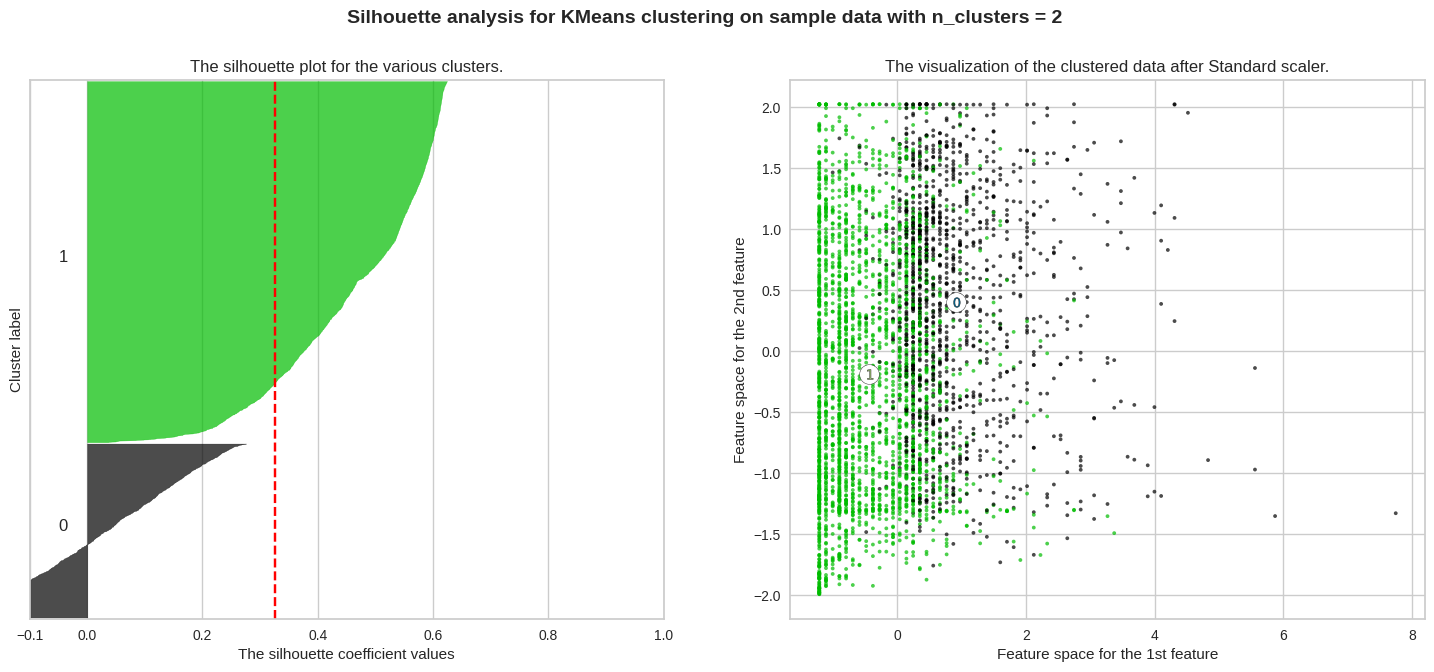

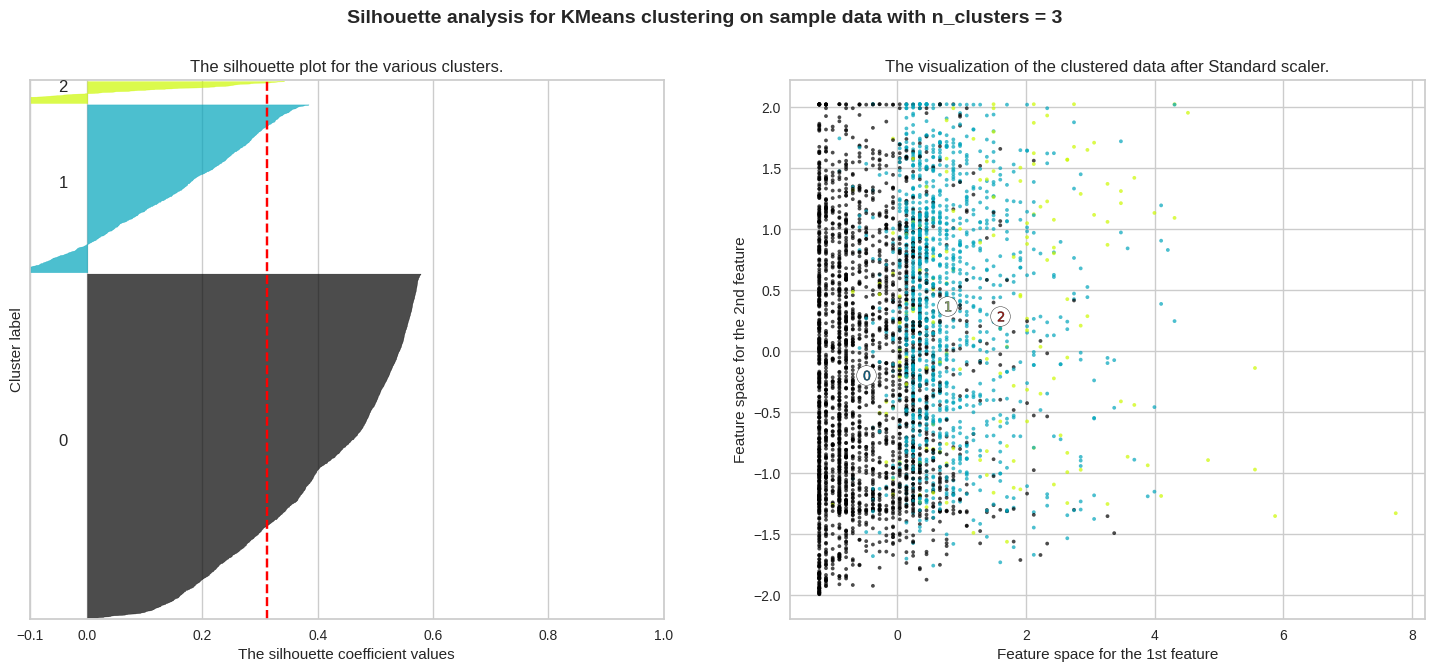

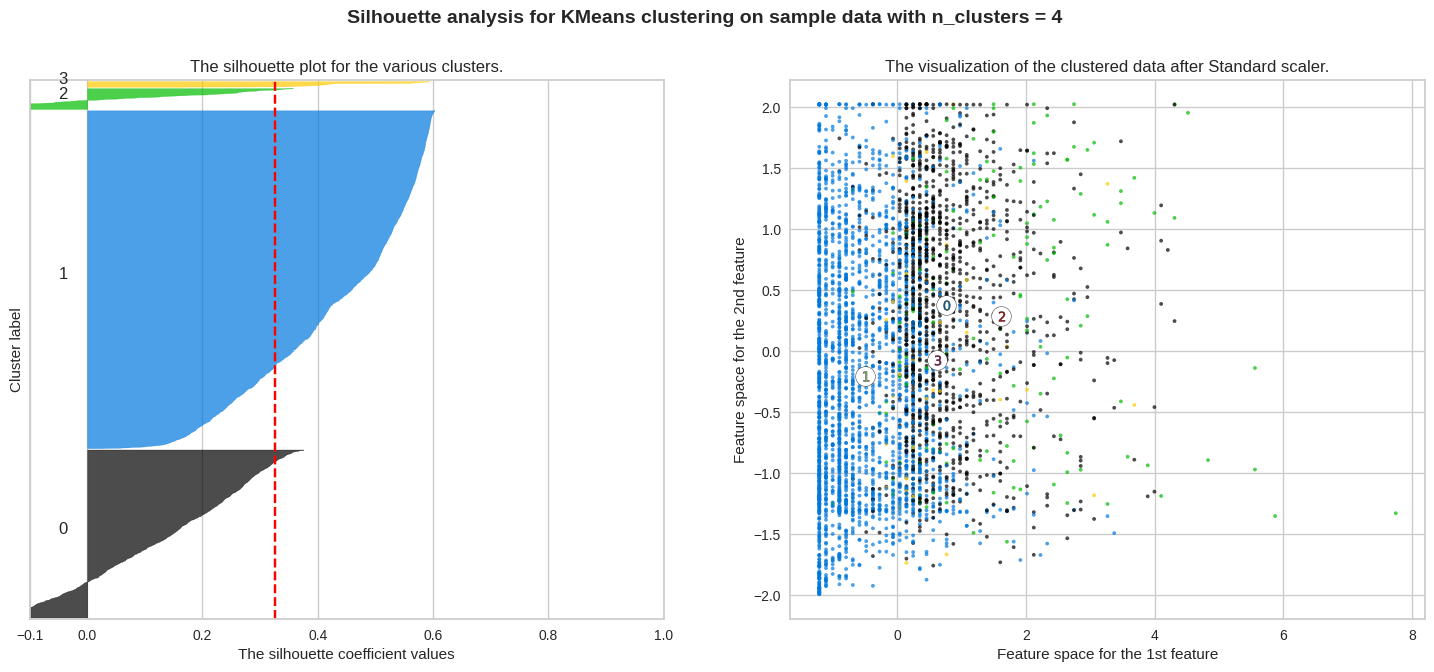

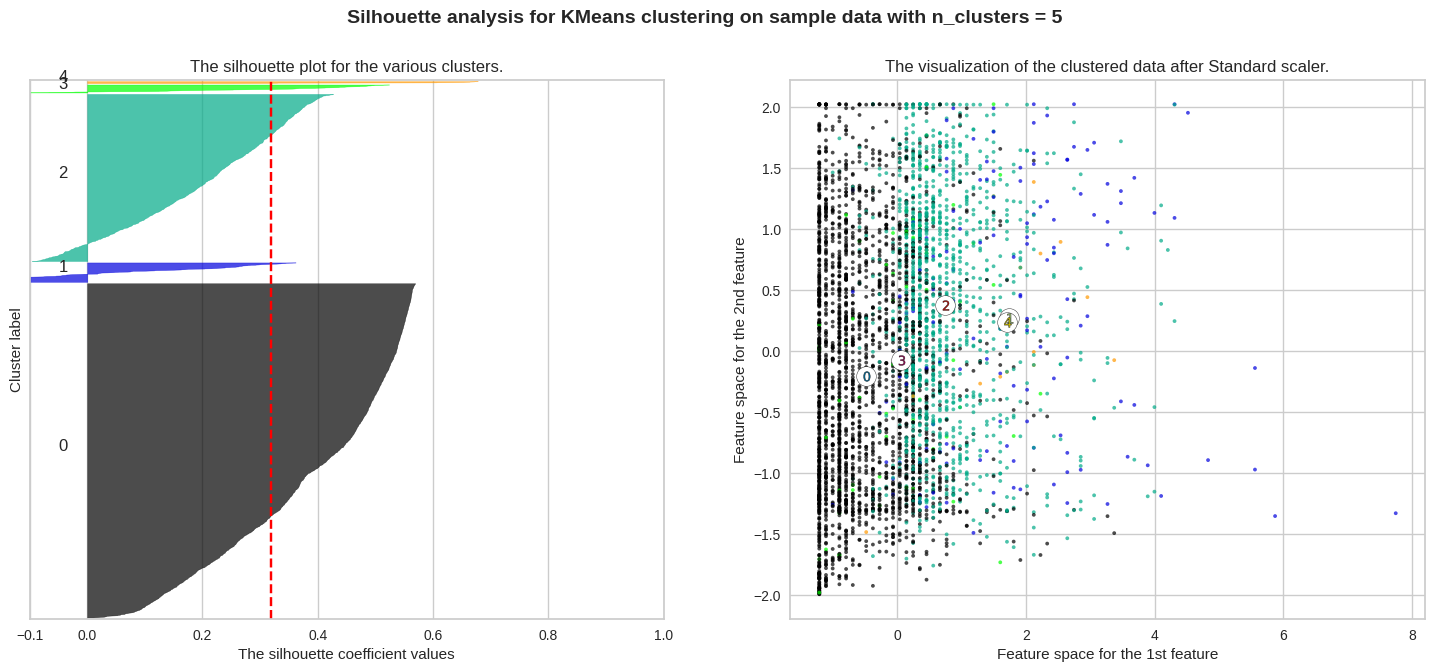

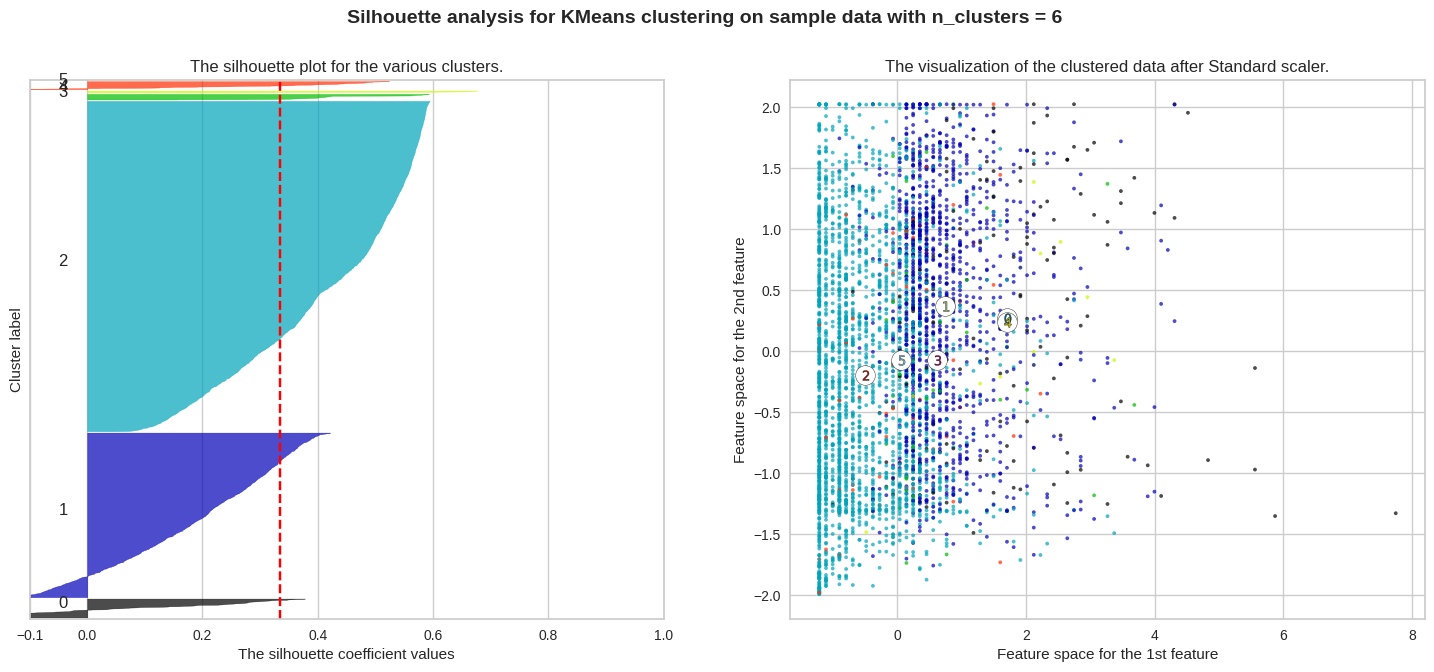

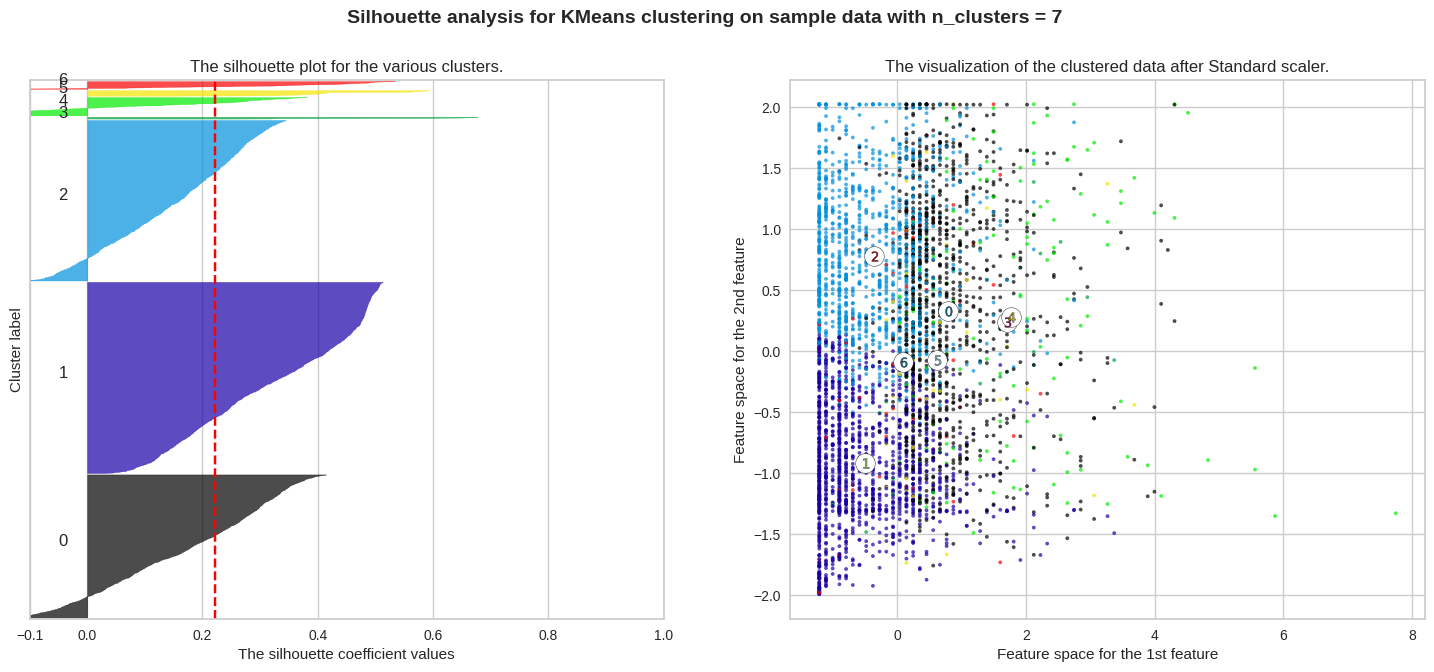

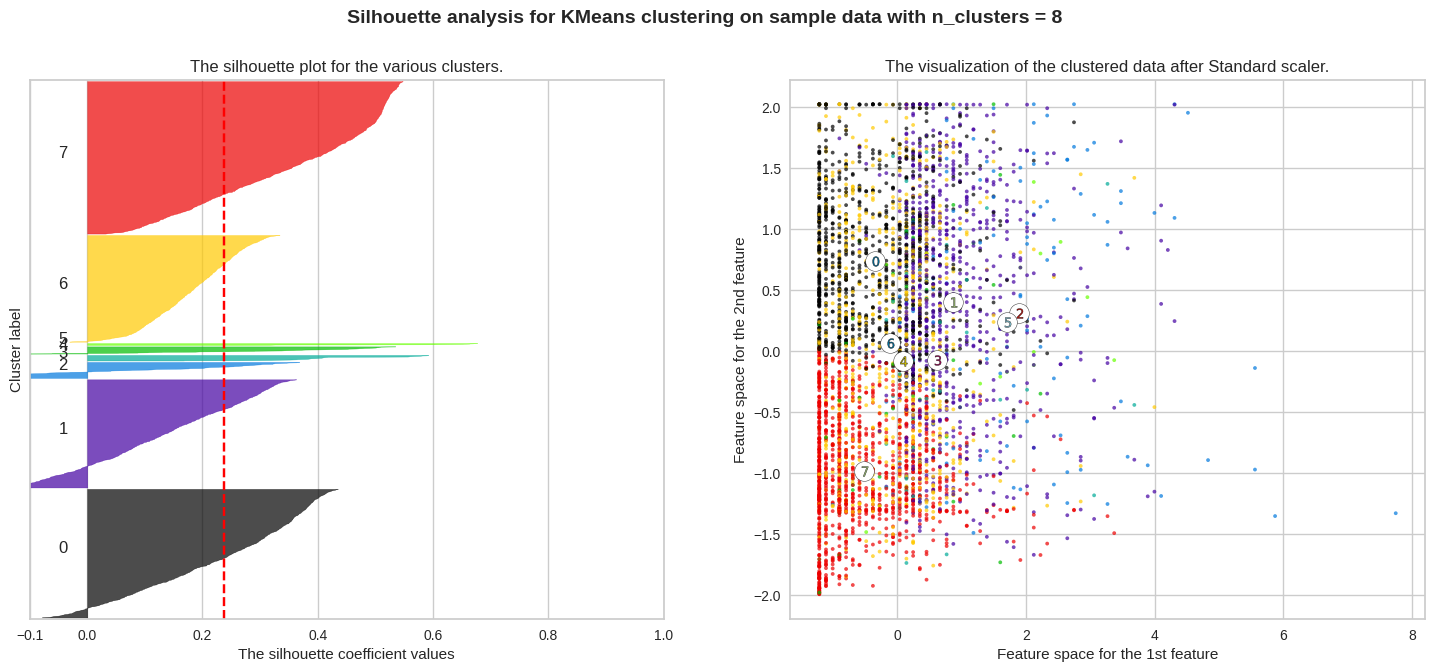

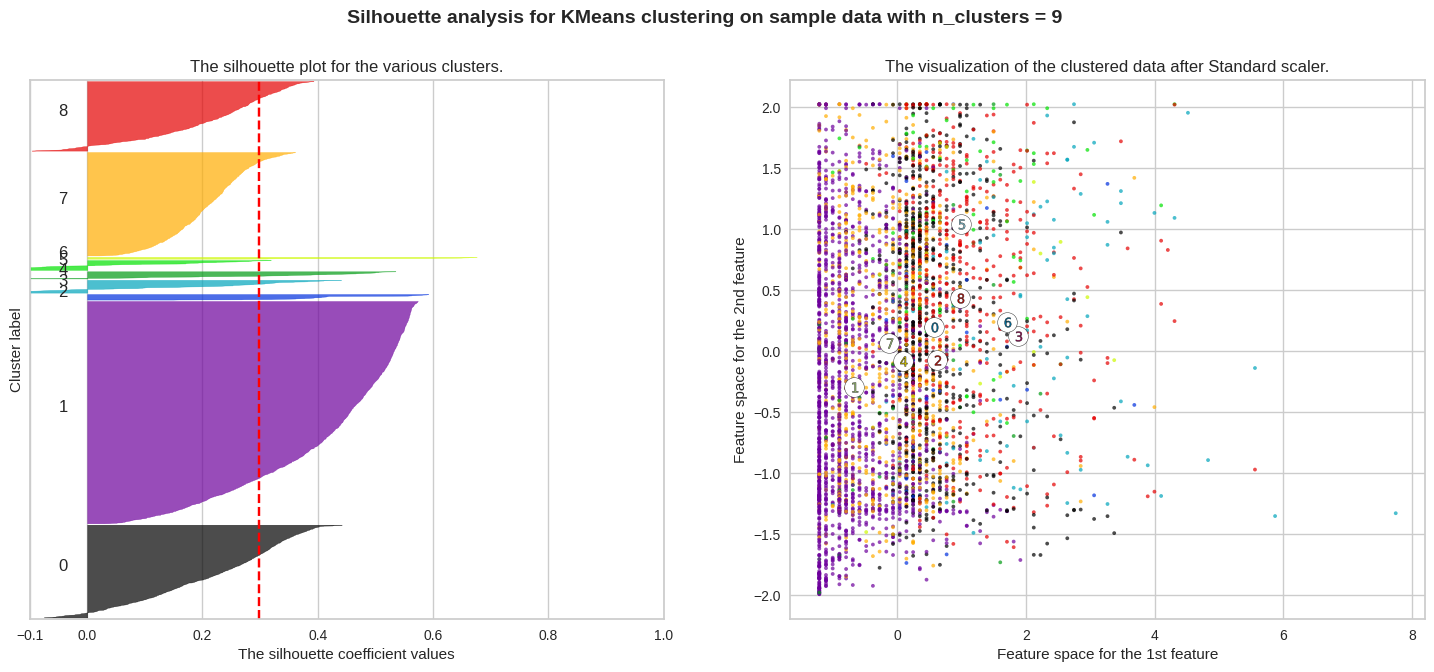

In [ ]:
range_n_clusters = [2,3,4,5,6,7,8,9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(std_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(std_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sil(std_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(std_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(std_df[:,6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,6], centers[:,9], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data after Standard scaler.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

####  Conclusion:
According the the silhouette score of:

The standardized data, the ideal number of clusters is 6, with a score higher than other options, of 0.33

## 6.3 Build KMeans Cluster algorithm using K=6 and Standard Scaler Applied Dataset <a class="anchor" id="6.3"></a>

In [ ]:
# We have found good number of clusters = 6
# Model building using cluster number = 6

model_kmeans = KMeans(n_clusters=6, random_state = 0, init = 'k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(3999,)

In [ ]:
# These are nothing but cluster labels

y_predict_kmeans

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
model_kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [ ]:
model_kmeans.cluster_centers_

array([[ 1.13686833,  0.4142613 ,  0.1345493 , -0.09824189, -0.06276658,
         0.65640088,  1.70548646,  3.77107713,  4.00212558,  0.27153799,
         0.88395812],
       [ 0.43381284, -0.11301262,  1.21014978, -0.09824189, -0.05449778,
         0.92813517,  0.75269133, -0.08065818, -0.08956555,  0.37079373,
         0.57854007],
       [-0.29444721, -0.12883455, -0.60151188, -0.09824189, -0.06071593,
        -0.51682757, -0.4934919 , -0.18636264, -0.19845942, -0.19791068,
        -0.34993321],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.45710365,  6.73109194, -0.04322862, -0.09824189, -0.06276658,
         0.06371677,  0.06535804,  0.3596938 ,  0.39424679, -0.07122344,
         0.387

In [ ]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster.
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

model_kmeans.inertia_

21089.973628929638

In [ ]:
#Assign clusters to the data set
df = data.copy()
df.rename({'ID#':'ID', 'Award?':'Award'}, inplace=True, axis=1)
df['Kmeans_label'] = model_kmeans.labels_

In [ ]:
# Group data by clusters (k=6)
df.groupby('Kmeans_label').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                       mean         mean      mean      mean      mean   
Kmeans_label                                                             
0             188155.664336  464.573427   2.244755  1.000000  1.000000   
1             117176.916331  58.446500    3.720837  1.000000  1.001609   
2             43882.372895   43.558140    1.229751  1.000000  1.000401   
3             68876.581395   23.255814    1.139535  2.348837  1.000000   
4             138061.400000  78.800000    3.466667  1.000000  4.066667   
5             119660.491803  5351.065574  2.000000  1.000000  1.000000   

               Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                      mean        mean              mean            mean   
Kmeans_label                                                               
0             32995.580420  27.979021   5739.692308       16.552448        
1             39485.872084  18.811746   346.617860        1.032180         
2             4644.210104   6.852847    199.160385        0.621091         
3             14689.837209  17.534884   582.627907        2.209302         
4             93927.866667  28.066667   506.666667        1.600000         
5             18683.475410  12.229508   963.639344        2.868852         

             Days_since_enroll     Award  
                          mean      mean  
Kmeans_label                              
0             4679.251748       0.797203  
1             4887.485921       0.649236  
2             3706.378508       0.200882  
3             3968.930233       0.395349  
4             4613.866667       0.533333  
5             3971.491803       0.557377

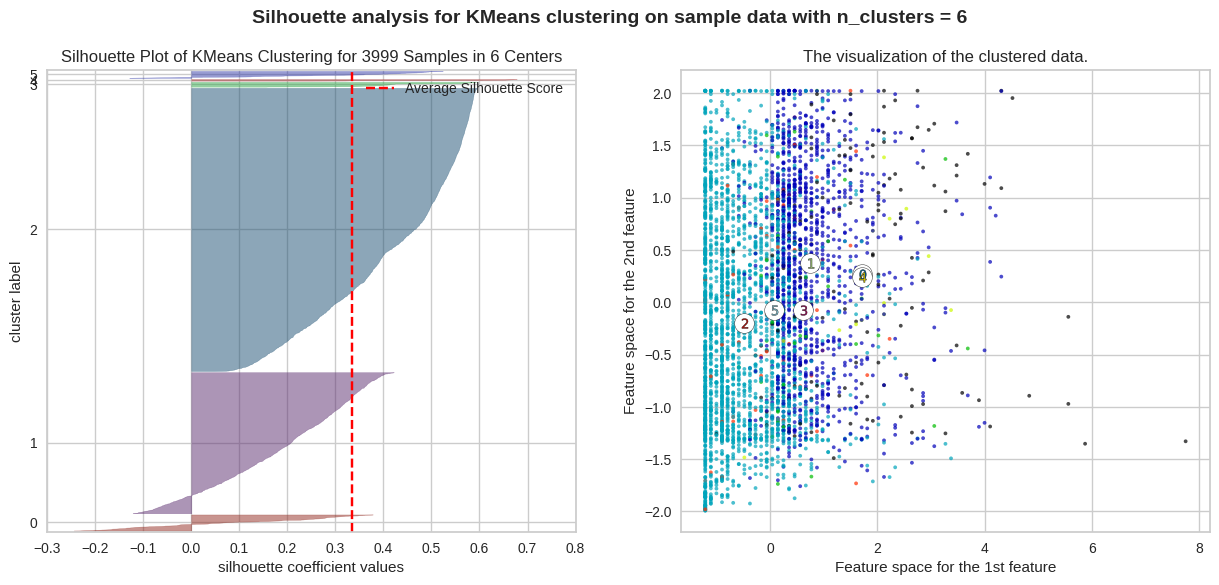

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2) = plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1 = SilhouetteVisualizer(model_kmeans,ax= ax1, colors=['#922B21','#5B2C6F','#1B4F72','#32a84a','#a83232','#323aa8'])
sil_visualizer1.fit(std_df)


# 2nd Plot showing the actual clusters formed

import matplotlib.cm as cm
colors1 = cm.nipy_spectral(model_kmeans.labels_.astype(float) / 6) # 6 is number of clusters
ax2.scatter(std_df[:, 6], std_df[:, 9], marker='.', s=30, lw=0, alpha=0.7,
                c=colors1, edgecolor='k')

# Labeling the clusters
centers1 = model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 6], centers1[:, 9], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[6], c[9], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 6),fontsize=14, fontweight='bold')

sil_visualizer1.show()
plt.show()

## 7 Hierarchical Clustering Algorithm<a class="anchor" id="7"></a>

### What is Hierarchical Clustering?
+ Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the dendrogram.

#### Types Of Hierarchical Clustering:
##### There are two types of hierarchical clustering:

+ <b>Agglomerative</b>: The data points are clustered using a bottom-up approach starting with individual data points.
+ <b>Divisive</b>: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

#### The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. There are three key questions that need to be answered first:

How many numbers of cluster. Also deciding which transformation data we will use to build model.

Qiuck Notes:

linkage{“ward”, “complete”, “average”, “single”}, default=”ward” Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

ward minimizes the variance of the clusters being merged.

average uses the average of the distances of each observation of the two sets.

complete or maximum linkage uses the maximum distances between all observations of the two sets.

single uses the minimum of the distances between all observations of the two sets.

### 7.2 Dendrogram on Standard Scaler Applied on Data<a class="anchor" id="7.2"></a>

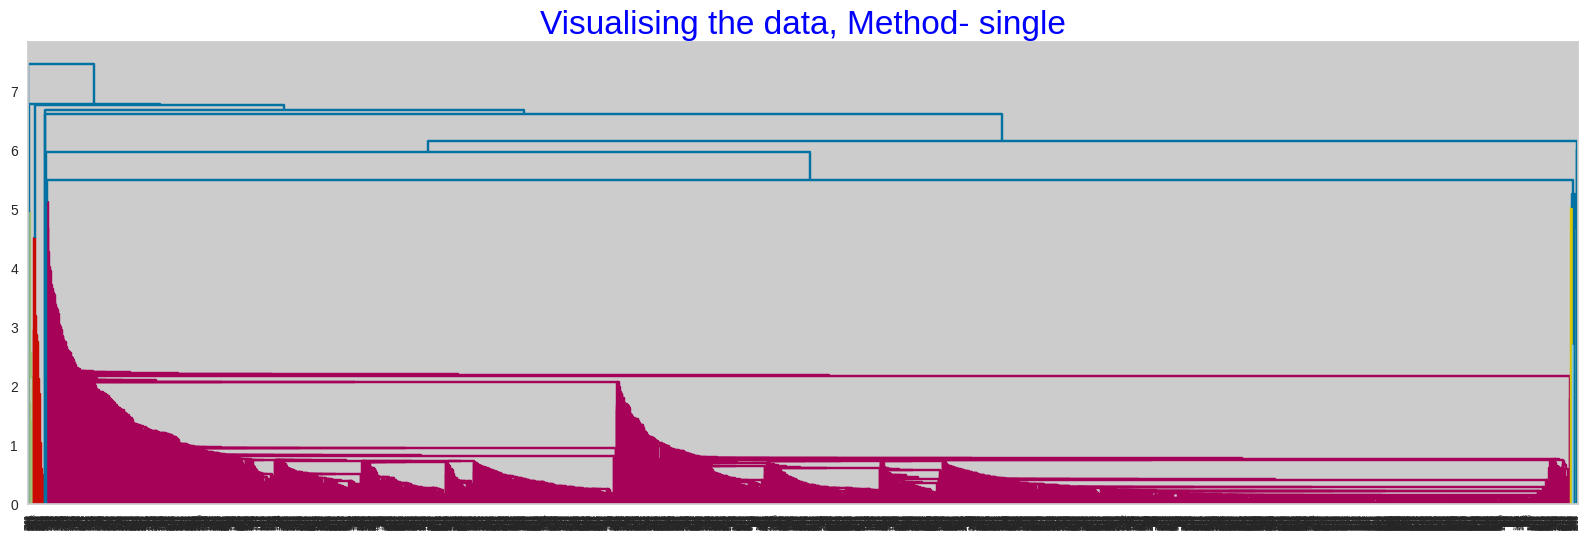

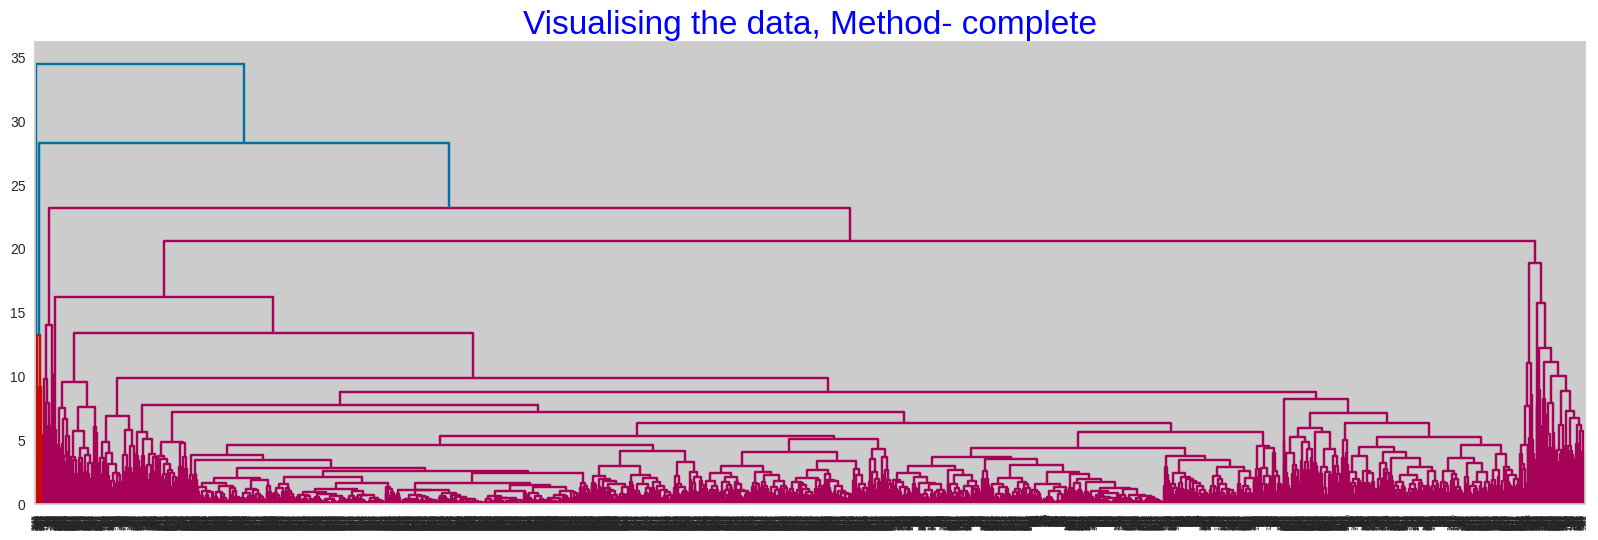

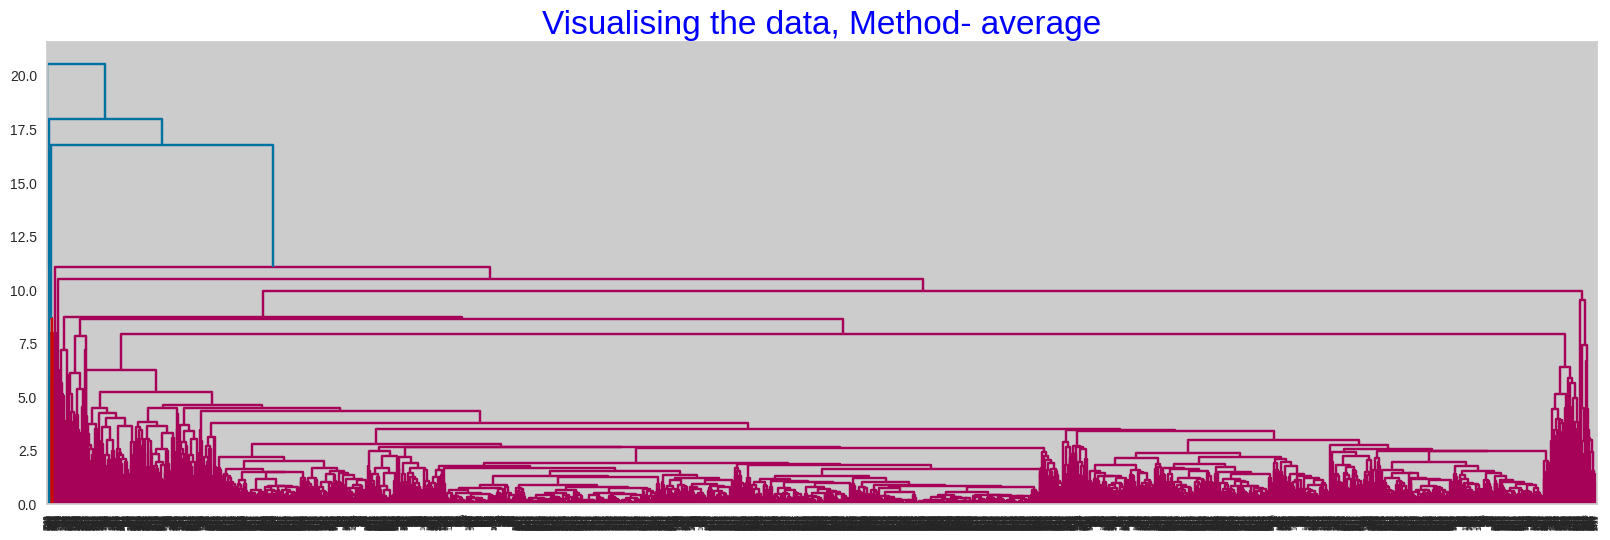

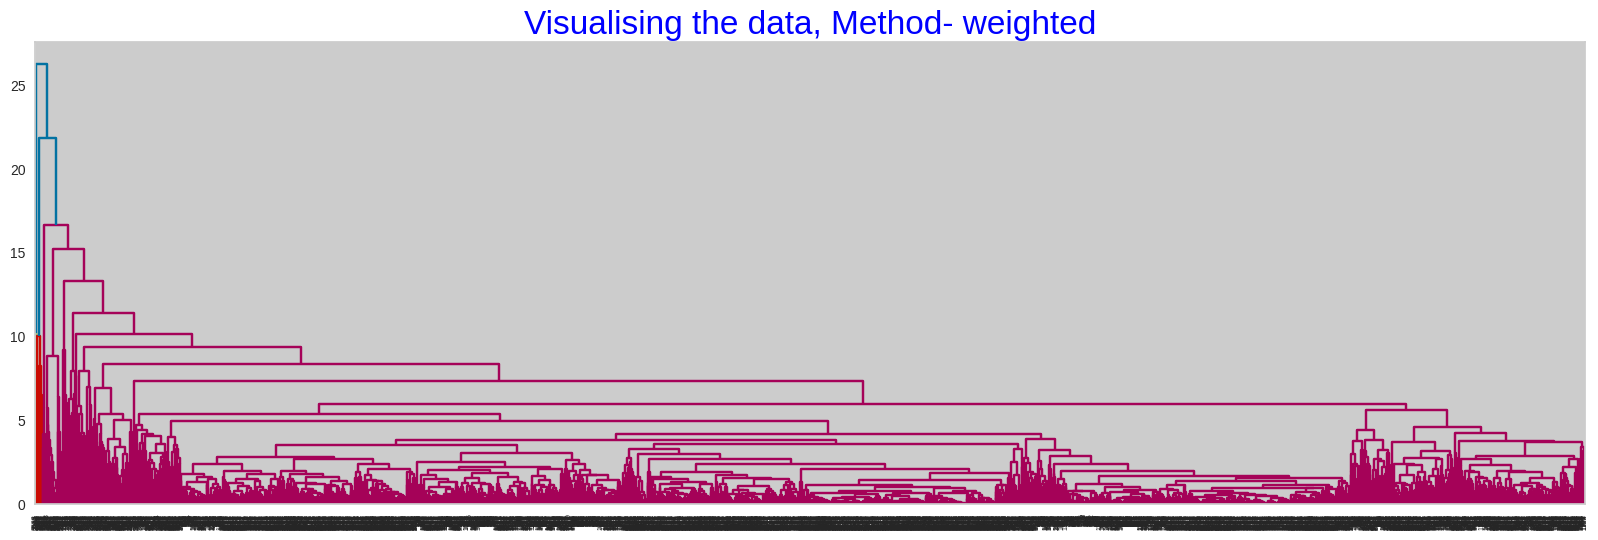

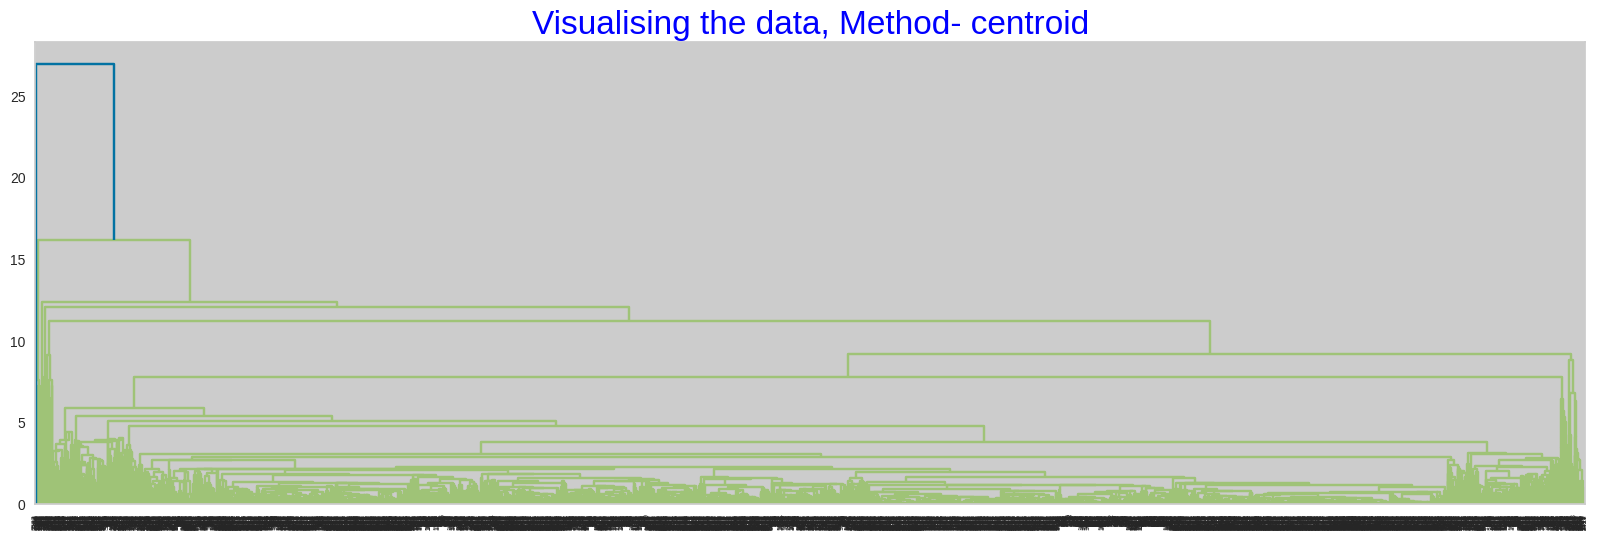

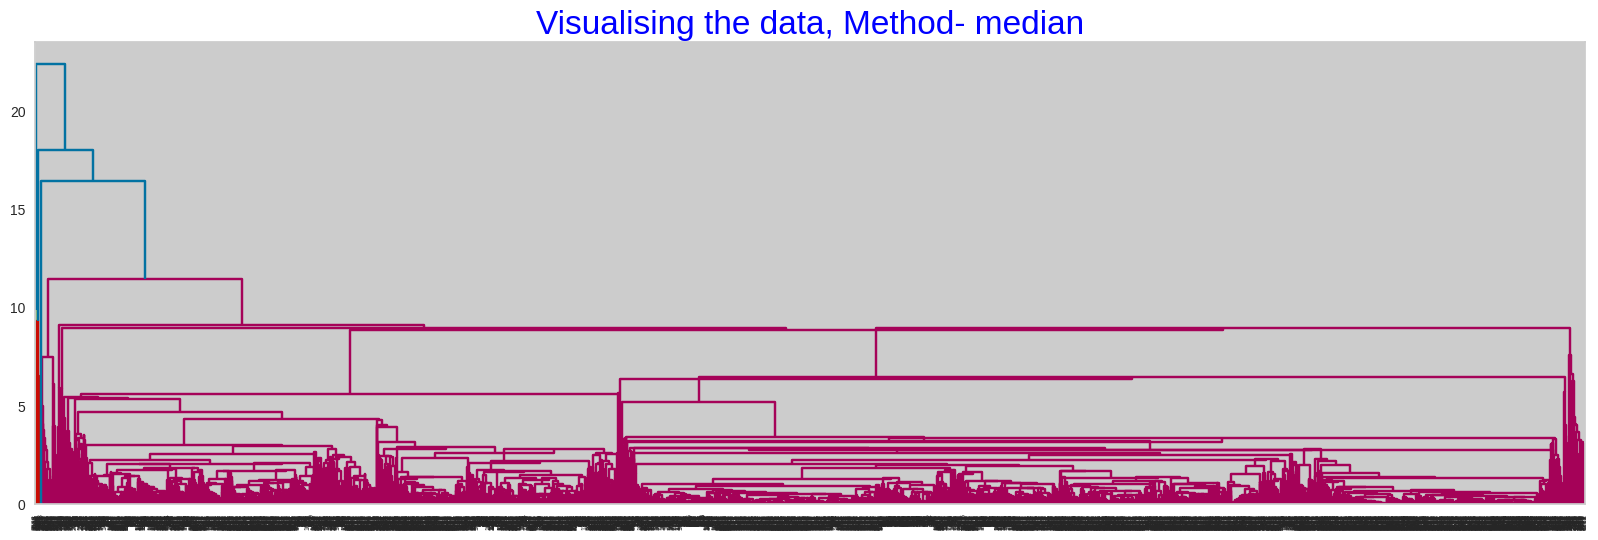

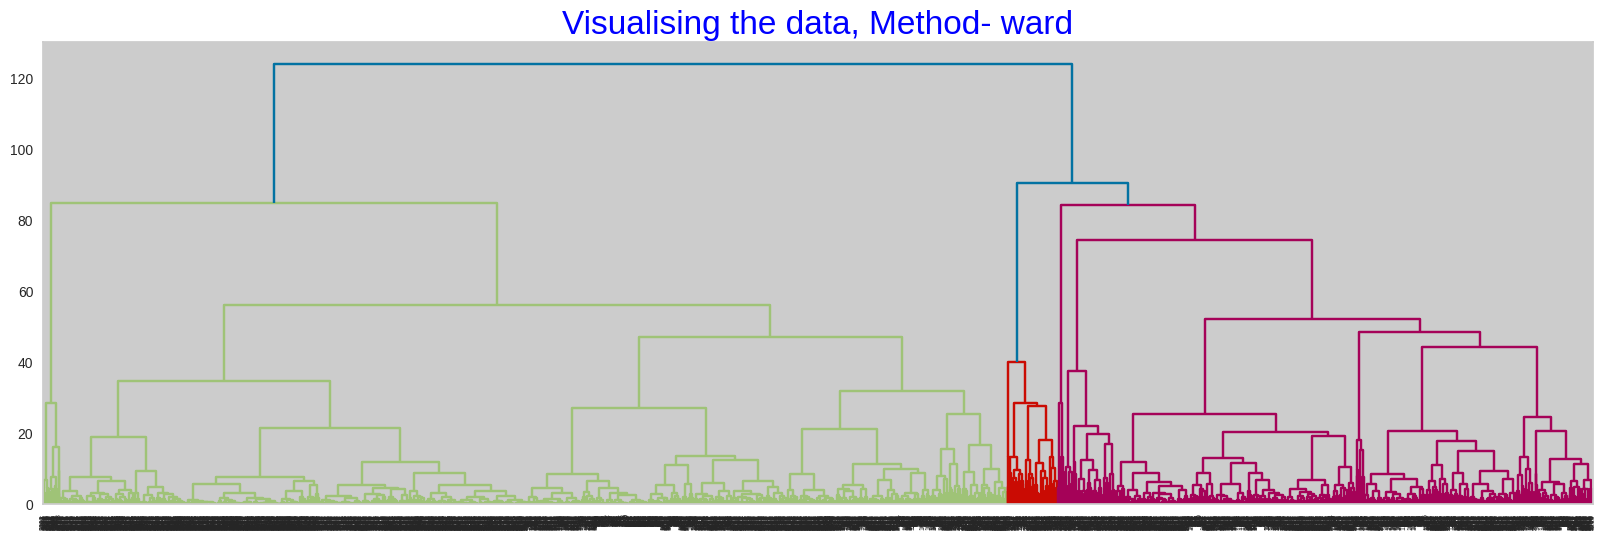

In [ ]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding.
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))

    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}

    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict)
    Dendrogram1 = sch.dendrogram(sch.linkage(std_df, method = methods,optimal_ordering=False))

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in n_clusters:
  for linkages in ['ward', 'complete', 'average', 'single']:
    hie_cluster1 = AgglomerativeClustering(n_clusters = n_clusters, linkage = linkages)
    hie_labels1 = hie_cluster1.fit_predict(std_df)
    silhouette_score1 = sil(std_df, hie_labels1)
    print('For n_clusters:', n_clusters, 'The average silhouette score is: ', silhouette_score1)
  print()

For n_clusters: 2 The average silhouette score is:  0.28926595242577247
For n_clusters: 2 The average silhouette score is:  0.8111134025692677
For n_clusters: 2 The average silhouette score is:  0.8111134025692677
For n_clusters: 2 The average silhouette score is:  0.8562820070415407

For n_clusters: 3 The average silhouette score is:  0.2940432062008608
For n_clusters: 3 The average silhouette score is:  0.7760836053602842
For n_clusters: 3 The average silhouette score is:  0.7838667595062349
For n_clusters: 3 The average silhouette score is:  0.7350532148998382

For n_clusters: 4 The average silhouette score is:  0.30814152852022786
For n_clusters: 4 The average silhouette score is:  0.5985727763092806
For n_clusters: 4 The average silhouette score is:  0.7731120442583631
For n_clusters: 4 The average silhouette score is:  0.5380065449865503

For n_clusters: 5 The average silhouette score is:  0.3098805307874414
For n_clusters: 5 The average silhouette score is:  0.5625737661941762
F

<b>Conclusion</b>: Max score is with cluster numbers 2 in standard scaler transformation and in Min Max scaler transformation.

+ Heirarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering: Agglomerative clustering Divisive clustering We now apply the Agglomerative clustering technique:Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined

## 7.3 PCA <a class="anchor" id="7.3"></a>

#### 7.3A Running PCA of standardized data.<a class="anchor" id="7.3A"></a>

In [ ]:
# Applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df = pca_std.fit_transform(std_df)

In [ ]:
# eigenvalues....

print(pca_std.singular_values_)

[114.62320365  83.12946351  64.9433498   63.53081811  61.96651495
  60.39644071  56.79935294  49.81594442  37.95522507]


In [ ]:
# Variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[29.86764604 15.70962673  9.58793945  9.17539578  8.72911177  8.29236866
  7.33403008  5.64147473  3.27490761]


In [ ]:
# Cummulative variance ratio...

# This will give an idea of, at how many no. of PCA's, the cummulative addition of
# variance will give much information

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.86764604, 45.57727277, 55.16521222, 64.340608  , 73.06971976,
       81.36208842, 88.69611851, 94.33759324, 97.61250085])

#### Conclusion:

by applying PCA on standardized data with 95% variance it gives 9 PCA components.

### 7.3B Silhouette Score method for PCA Standard Scaled Data <a class="anchor" id="7.3B"></a>

In [ ]:
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in n_clusters:
  for linkages in ['ward','complete','average', 'single']:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkages)
    hie_labels1 = agg_clustering.fit_predict(pca_std_df)
    silhouette_score1 = sil(pca_std_df, hie_labels1)
    print('For n_clusters: ',n_clusters, 'The average silhouette score with linkage :',linkages, ':', silhouette_score1)
  print()



For n_clusters:  2 The average silhouette score with linkage : ward : 0.19974848194356434
For n_clusters:  2 The average silhouette score with linkage : complete : 0.8108872970217894
For n_clusters:  2 The average silhouette score with linkage : average : 0.8108872970217894
For n_clusters:  2 The average silhouette score with linkage : single : 0.738348693430483

For n_clusters:  3 The average silhouette score with linkage : ward : 0.21117381561703905
For n_clusters:  3 The average silhouette score with linkage : complete : 0.7784326687701913
For n_clusters:  3 The average silhouette score with linkage : average : 0.7858157031588873
For n_clusters:  3 The average silhouette score with linkage : single : 0.7380711786432604

For n_clusters:  4 The average silhouette score with linkage : ward : 0.21512158688323973
For n_clusters:  4 The average silhouette score with linkage : complete : 0.6685647808748002
For n_clusters:  4 The average silhouette score with linkage : average : 0.775475589

### 7.3C Run Hierarchical Clustering.(Agglomerative Clustering) <a class="anchor" id="7.3C"></a>

In [ ]:
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3999,)


array([0, 0, 0, ..., 0, 0, 0])

<b>Ward</b> method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [ ]:
# Cluster numbers

agg_clustering.n_clusters_

15

In [ ]:
# Clustering score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

45.284

### Putting Cluster lables into original dataset And analysis of the same

In [ ]:
# Concating labels with main dataset

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Hierarchical_labels  
ID                       
1   0                    
2   0                    
3   0                    
4   0                    
5   0

In [ ]:
df.groupby('Hierarchical_labels').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                             mean         mean      mean      mean      mean   
Hierarchical_labels                                                            
0                    7.265919e+04  143.203765   2.063851  1.0       1.0        
1                    7.211320e+04  0.000000     3.200000  1.0       5.0        
2                    1.226280e+05  296.000000   3.000000  1.0       1.0        
3                    7.779364e+04  0.000000     1.214286  2.0       1.0        
4                    1.425270e+05  1000.000000  1.000000  3.0       1.0        
5                    8.940133e+04  0.000000     3.000000  1.0       2.0        
6                    1.220337e+05  0.000000     4.666667  1.0       3.0        
7                    5.298860e+05  7210.000000  1.000000  1.0       1.0        
8                    1.020226e+05  0.000000     3.600000  1.0       4.0        
9                    1.704838e+06  0.000000     1.000000  1.0       1.0        
10                   6.448810e+05  2600.000000  1.000000  1.0       1.0        
11                   7.375140e+05  0.000000     3.000000  1.0       4.0        
12                   9.662700e+04  1182.000000  1.000000  1.0       3.0        
13                   1.601140e+05  500.000000   1.000000  1.0       1.0        
14                   4.578171e+04  0.000000     1.000000  3.0       1.0        

                       Bonus_miles Bonus_trans Flight_miles_12mo  \
                              mean        mean              mean   
Hierarchical_labels                                                
0                    16804.893920   11.398372   433.440855         
1                    123246.200000  23.000000   220.000000         
2                    63527.666667   63.666667   16341.000000       
3                    11625.214286   16.785714   523.678571         
4                    24091.000000   47.000000   4650.000000        
5                    47920.000000   17.000000   0.000000           
6                    83110.333333   35.000000   333.333333         
7                    23866.000000   26.000000   7741.000000        
8                    90060.800000   27.000000   210.000000         
9                    17108.000000   32.000000   4823.000000        
10                   14350.000000   28.000000   10850.000000       
11                   43993.000000   40.000000   2150.000000        
12                   49059.000000   26.000000   2300.000000        
13                   71954.000000   86.000000   30817.000000       
14                   20147.571429   16.928571   410.000000         

                    Flight_trans_12 Days_since_enroll     Award  
                               mean              mean      mean  
Hierarchical_labels                                              
0                    1.300687        4118.994149       0.368354  
1                    0.600000        4058.400000       0.800000  
2                    48.000000       2476.000000       1.000000  
3                    1.678571        3911.821429       0.392857  
4                    24.000000       3206.000000       1.000000  
5                    0.000000        3863.333333       0.333333  
6                    0.666667        4499.000000       0.333333  
7                    15.000000       8296.000000       1.000000  
8                    0.600000        4730.200000       0.400000  
9                    23.000000       7283.000000       1.000000  
10                   26.000000       2511.000000       1.000000  
11                   7.000000        5030.000000       0.000000  
12                   9.000000        6738.000000       1.000000  
13                   53.000000       1373.000000       1.000000  
14                   1.714286        4137.642857       0.357143

KeyError: "None of [Index(['ID'], dtype='object')] are in the [columns]"

KeyError: 'ID'

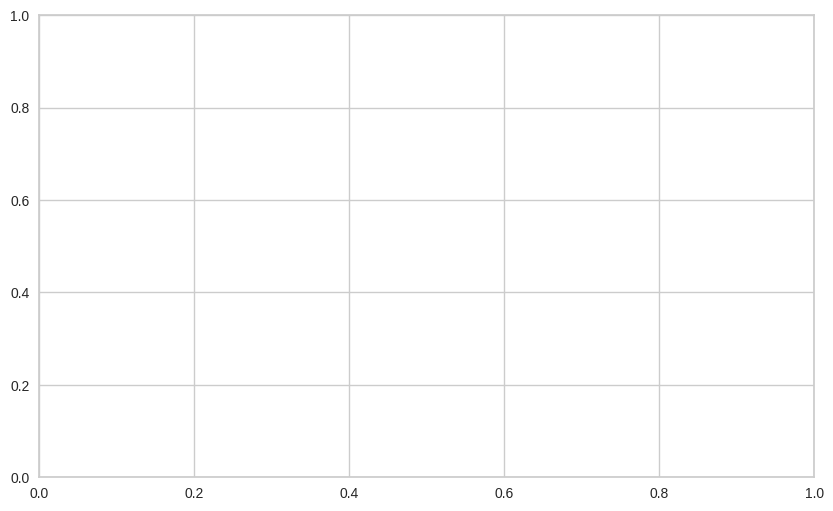

In [ ]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Hierarchical_labels']).count()(df['ID']).plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering PCA MinMax Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()